# **I. PLANTEAMIENTO DEL PROBLEMA**

## **Situación Problemática**

> En el sector de telecomunicaciones móviles del Perú, la portabilidad numérica permite a los usuarios cambiar de operador sin perder su número. Este mecanismo fomenta la competencia entre empresas, obligándoles a mejorar la calidad del servicio y a ajustar los planes comerciales. Las empresas operadoras deben monitorear y analizar estos cambios para tomar decisiones estratégicas respecto a la captación y retención de clientes.





## **Contexto del Problema**
> Actualmente, las empresas operadoras no cuentan con una herramienta predictiva basada en inteligencia artificial que les permita analizar patrones de migración de usuarios entre operadores móviles, considerando tanto el operador cedente y receptor como la modalidad (prepago o postpago) y su frecuencia mensual. Esta falta de análisis impide anticipar tendencias de fuga de clientes, identificar fortalezas o debilidades frente a la competencia, y diseñar campañas comerciales más efectivas.

## **Objetivos del Proyecto**
>**Objetivo Principal**
*   Desarrollar un modelo de aprendizaje automático que permita analizar los patrones de portabilidad móvil entre operadores en el Perú.

> **Objetivos especificos**
*   Preprocesar y limpiar el dataset de portabilidad para su correcta interpretación y uso en modelos de análisis.
*   Explorar y visualizar las tendencias de portabilidad entre operadores móviles por modalidad (prepago/postpago) y frecuencia anual.
*   Aplicar técnicas de machine learning para identificar patrones de comportamiento y relaciones relevantes entre operadores cedentes y receptores.






# **II. ANÁLISIS DEL DATASET**

## **Extracción adecuada del Dataset**

### **Importar Librerias**

In [182]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para el manejo de datos tabulares
import numpy as np   # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización de datos avanzada
import math #Funciones matemáticas que permite realizar cálculos matemáticos avanzados y precisos

### **Montar el Drive**

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Cargar Dataset**

In [184]:
#Cargar el archivo EXCEL desde Google Drive
#El archivo se encuentra en la ruta "/content/drive/MyDrive/Datasets/portabilidad.xlsx"

df=pd.read_excel("/content/drive/MyDrive/Datasets/portabilidad.xlsx")


#de ahora en adelante el archivo EXCEL /content/drive/MyDrive/Datasets/portabilidad.xlsx esta almacenado en un dataframe en una variable llamada "df"

### **Info y Mostrar Dataset/Dataframe**

In [185]:
#Info es para mostrar un resumen conciso de la información del DataFrame.
# Util para hacer una primera inspección de los datos y determinar qué pasos adicionales pueden ser necesarios para procesar y limpiar el dataset antes de analizarlo.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB
None


In [186]:
#utilizamos la función display() para mostrar el DataFrame
display(df)

,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas
0,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2014-07-01,112
1,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,162
2,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,35
3,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,18
4,Telefónica del Perú S.A.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,601
...,...,...,...,...,...,...
7090,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,POSTPAGO,PREPAGO,2025-02-01,2128
7091,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,4549
7092,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2025-02-01,11383
7093,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,11


## **Identificación y Tratamiento**

### **Nulos y valores faltantes**

In [187]:
# Devuelve True si hay al menos un valor nulo en la columna, False si no hay ninguno
print(df.isnull().any())

Cedente               False
Receptor              False
Modalidad Cedente     False
Modalidad Receptor    False
Mes                   False
Líneas                False
dtype: bool


In [188]:
# Devuelve la cantidad de valores nulos en cada columna
print(df.isnull().sum())

Cedente               0
Receptor              0
Modalidad Cedente     0
Modalidad Receptor    0
Mes                   0
Líneas                0
dtype: int64


In [189]:
# Devuelve el porcentaje de valores nulos en cada columna
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print(porcentaje_nulos)

Cedente               0.0
Receptor              0.0
Modalidad Cedente     0.0
Modalidad Receptor    0.0
Mes                   0.0
Líneas                0.0
dtype: float64


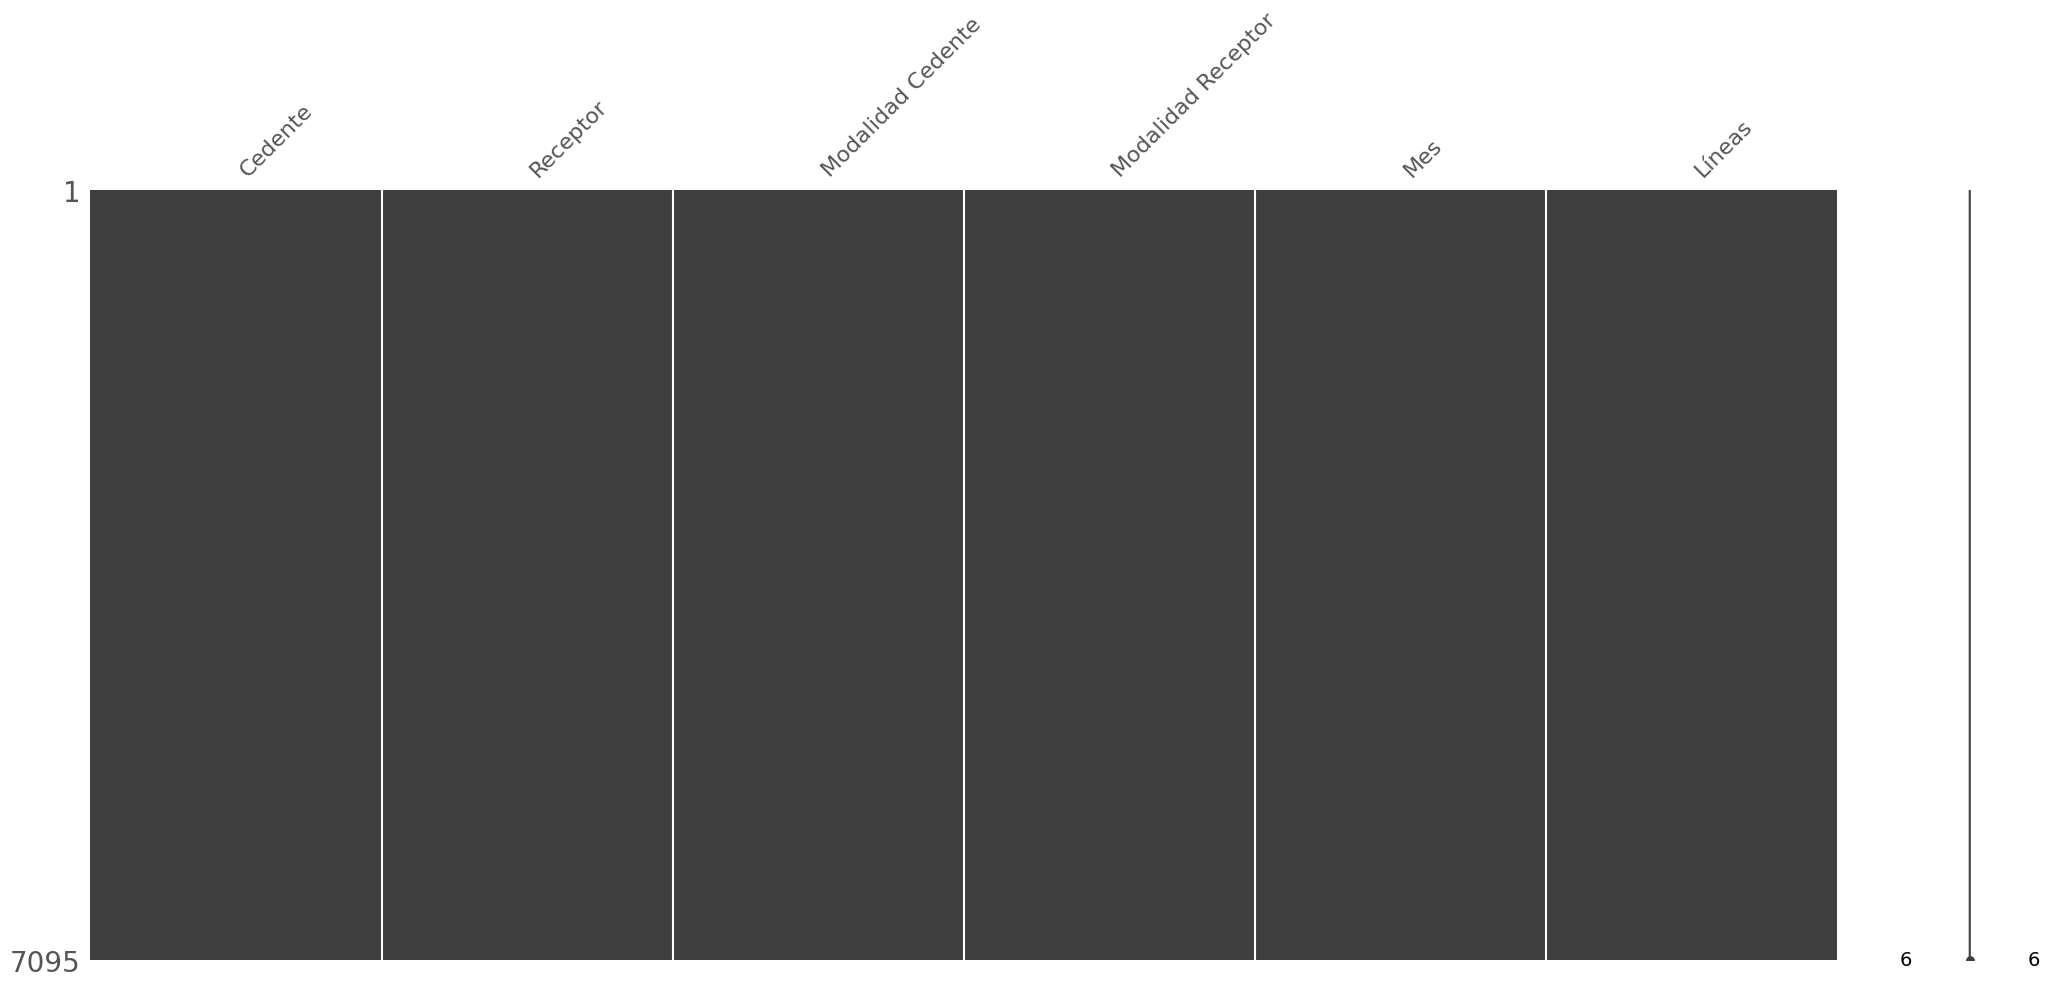

In [190]:
# VER VALORES NULOS EN GRAFICA
import missingno as msno #Esta librería ayuda a identificar patrones de valores perdidos de manera gráfica,
                        #lo cual es útil en análisis de datos, ya que permite observar dónde y en qué cantidad están los valores faltantes
msno.matrix(df)
plt.show()

##**Profiling Report**

Esto generará un informe detallado con estadísticas descriptivas, distribuciones, correlaciones y más, permitiéndote explorar fácilmente los datos del dataset. Luego de este reporte continuaremos con instrucciones para manipulación del Df

In [191]:
!pip install pydantic-settings #Instalar libreria pydantic-settings, la cual es una extensión de Pydantic (una biblioteca de validación de datos en Python) y facilita el manejo y la gestión de configuraciones y variables de entorno en aplicaciones de Python
!pip install -U ydata-profiling # Install/Upgrade ydata-profiling (the successor to pandas-profiling)
from ydata_profiling import ProfileReport # Permite un análisis muy detallado de tu dataset y es adecuado para detectar problemas de calidad de datos, exploración inicial y más.

profile = ProfileReport(df, title="Profiling Report")

# Mostrar el reporte en Google Colab
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 35.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [192]:
#Descargar el profiling report

profile.to_file("profiling_report.html")
# Download the HTML report
from google.colab import files
files.download("profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Variables categóricas**
Las variables categóricas en un dataset son aquellas que contienen valores que representan categorías o grupos en lugar de números que tengan un significado matemático. Estas variables se utilizan para clasificar los datos en distintos grupos o etiquetas. Pueden ser tanto nominales como ordinales, dependiendo de si tienen o no un orden implícito

**Variables categóricas ordinales:**
Modalidad Cedente y Modalidad Receptor: Si asumimos que "POSTPAGO" tiene un orden respecto a "PREPAGO" (por ejemplo, los planes postpago podrían tener más beneficios o ser más costosos que los planes prepago).



**Variables categóricas nominal:**
En ella tenemos Cedente y Receptor.

#### **Cambiar el tipo de dato a categórica**

In [193]:
# Convertir las variables a tipo categórico
for column in ['Cedente', 'Receptor', 'Modalidad Cedente', 'Modalidad Receptor']:
  df[column] = pd.Categorical(df[column])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   category      
 1   Receptor            7095 non-null   category      
 2   Modalidad Cedente   7095 non-null   category      
 3   Modalidad Receptor  7095 non-null   category      
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: category(4), datetime64[ns](1), int64(1)
memory usage: 139.7 KB
None


In [194]:
# Crear arreglo de  variables categoricas identificandolas automaticamente por el tipo de dato
var_categoricas = [col for col in df.columns if df[col].dtype == 'category']
var_categoricas

['Cedente', 'Receptor', 'Modalidad Cedente', 'Modalidad Receptor']

### **Transformaciones necesarias**

#### **Extraemos características temporales de la variable Mes**

In [195]:
df['Mes'] = pd.to_datetime(df['Mes'])
df['Año'] = df['Mes'].dt.year
df['Número de Mes'] = df['Mes'].dt.month
df['Trimestre'] = df['Mes'].dt.quarter

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   category      
 1   Receptor            7095 non-null   category      
 2   Modalidad Cedente   7095 non-null   category      
 3   Modalidad Receptor  7095 non-null   category      
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
 6   Año                 7095 non-null   int32         
 7   Número de Mes       7095 non-null   int32         
 8   Trimestre           7095 non-null   int32         
dtypes: category(4), datetime64[ns](1), int32(3), int64(1)
memory usage: 222.8 KB


,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas,Año,Número de Mes,Trimestre
0,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2014-07-01,112,2014,7,3
1,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,162,2014,7,3
2,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,35,2014,7,3
3,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,18,2014,7,3
4,Telefónica del Perú S.A.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,601,2014,7,3


In [196]:
# prompt: eliminar las filas que corresponde a los años 2014,2019,2020 y 2025

df = df[~df['Año'].isin([2014, 2019, 2020, 2025])].copy()
print(df['Año'].unique())

[2015 2016 2017 2018 2021 2022 2023 2024]


#### **Diferencia entre modalidades**

In [197]:
# La variable 'Mismo Tipo Modalidad' nos brindará 0 o 1, si la modalidad cedente y receptor según corresponda (Prepago - Postpago)
df['Mismo Tipo Modalidad'] = (df['Modalidad Cedente'] == df['Modalidad Receptor']).astype(int)

df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 121 to 6952
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Cedente               5301 non-null   category      
 1   Receptor              5301 non-null   category      
 2   Modalidad Cedente     5301 non-null   category      
 3   Modalidad Receptor    5301 non-null   category      
 4   Mes                   5301 non-null   datetime64[ns]
 5   Líneas                5301 non-null   int64         
 6   Año                   5301 non-null   int32         
 7   Número de Mes         5301 non-null   int32         
 8   Trimestre             5301 non-null   int32         
 9   Mismo Tipo Modalidad  5301 non-null   int64         
dtypes: category(4), datetime64[ns](1), int32(3), int64(2)
memory usage: 249.4 KB


,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas,Año,Número de Mes,Trimestre,Mismo Tipo Modalidad
121,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2015-01-01,1741,2015,1,1,1
122,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2015-01-01,1902,2015,1,1,1
123,América Móvil Perú S.A.C.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2015-01-01,304,2015,1,1,1
124,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2015-01-01,252,2015,1,1,1
125,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2015-01-01,303,2015,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6948,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2024-12-01,4052,2024,12,4,0
6949,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2024-12-01,7854,2024,12,4,1
6950,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,POSTPAGO,POSTPAGO,2024-12-01,4,2024,12,4,1
6951,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2024-12-01,498,2024,12,4,0


### **Agregación / eliminación de variables**

#### **Totales por operador y mes**

In [198]:
df_agregado_cedente = df.groupby(['Mes', 'Cedente']).agg({'Líneas': 'sum'}).reset_index()
print(df_agregado_cedente)

           Mes                      Cedente  Líneas
0   2015-01-01    América Móvil Perú S.A.C.   17136
1   2015-01-01        Dolphin Mobile S.A.C.       0
2   2015-01-01              Entel Perú S.A.    3468
3   2015-01-01  Flash Servicios Perú S.R.L.       0
4   2015-01-01         Guinea Mobile S.A.C.       0
..         ...                          ...     ...
763 2024-12-01  Flash Servicios Perú S.R.L.    2759
764 2024-12-01         Guinea Mobile S.A.C.     130
765 2024-12-01       Suma Móvil Perú S.A.C.       0
766 2024-12-01   Telefónica del Perú S.A.A.  154772
767 2024-12-01          Viettel Perú S.A.C.   99632

[768 rows x 3 columns]


In [199]:
df_agregado_receptor = df.groupby(['Mes', 'Receptor']).agg({'Líneas': 'sum'}).reset_index()
print(df_agregado_receptor)

           Mes                        Receptor  Líneas
0   2015-01-01       América Móvil Perú S.A.C.    9234
1   2015-01-01           Dolphin Mobile S.A.C.       0
2   2015-01-01  Dolphin Telecom del Perú S.AC.       0
3   2015-01-01                 Entel Perú S.A.   17626
4   2015-01-01     Flash Servicios Perú S.R.L.       0
..         ...                             ...     ...
859 2024-12-01     Flash Servicios Perú S.R.L.       0
860 2024-12-01            Guinea Mobile S.A.C.     173
861 2024-12-01          Suma Móvil Perú S.A.C.       0
862 2024-12-01      Telefónica del Perú S.A.A.  150416
863 2024-12-01             Viettel Perú S.A.C.  110263

[864 rows x 3 columns]


#### **Flujo neto por operador**

In [200]:
# Líneas salientes
salidas = df.groupby(['Mes', 'Cedente'])['Líneas'].sum().reset_index()


# Líneas entrantes
entradas = df.groupby(['Mes', 'Receptor'])['Líneas'].sum().reset_index()


# Flujo neto
flujo_neto = salidas.merge(entradas, left_on=['Mes', 'Cedente'], right_on=['Mes', 'Receptor'], how='outer')
flujo_neto['Flujo_Neto'] = flujo_neto['Líneas_y'] - flujo_neto['Líneas_x']

print(flujo_neto)

           Mes                      Cedente  Líneas_x  \
0   2015-01-01    América Móvil Perú S.A.C.   17136.0   
1   2015-01-01        Dolphin Mobile S.A.C.       0.0   
2   2015-01-01                          NaN       NaN   
3   2015-01-01              Entel Perú S.A.    3468.0   
4   2015-01-01  Flash Servicios Perú S.R.L.       0.0   
..         ...                          ...       ...   
859 2024-12-01  Flash Servicios Perú S.R.L.    2759.0   
860 2024-12-01         Guinea Mobile S.A.C.     130.0   
861 2024-12-01       Suma Móvil Perú S.A.C.       0.0   
862 2024-12-01   Telefónica del Perú S.A.A.  154772.0   
863 2024-12-01          Viettel Perú S.A.C.   99632.0   

                           Receptor  Líneas_y  Flujo_Neto  
0         América Móvil Perú S.A.C.      9234     -7902.0  
1             Dolphin Mobile S.A.C.         0         0.0  
2    Dolphin Telecom del Perú S.AC.         0         NaN  
3                   Entel Perú S.A.     17626     14158.0  
4       Flash S

#### **Porcentaje de participación mensual**

In [201]:
# Porcentaje que representa cada operación respecto al total de líneas portadas ese mes.

# Calcular total de líneas por mes
total_mes = df.groupby('Mes')['Líneas'].transform('sum')

# Crear nueva variable
df['Porcentaje Participación'] = (df['Líneas'] / total_mes) * 100

display(df)
df.info()

,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas,Año,Número de Mes,Trimestre,Mismo Tipo Modalidad,Porcentaje Participación
121,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2015-01-01,1741,2015,1,1,1,4.743223
122,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2015-01-01,1902,2015,1,1,1,5.181855
123,América Móvil Perú S.A.C.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2015-01-01,304,2015,1,1,1,0.828225
124,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2015-01-01,252,2015,1,1,1,0.686555
125,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2015-01-01,303,2015,1,1,1,0.825501
...,...,...,...,...,...,...,...,...,...,...,...
6948,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2024-12-01,4052,2024,12,4,0,0.701480
6949,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2024-12-01,7854,2024,12,4,1,1.359680
6950,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,POSTPAGO,POSTPAGO,2024-12-01,4,2024,12,4,1,0.000692
6951,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2024-12-01,498,2024,12,4,0,0.086213


<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 121 to 6952
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Cedente                   5301 non-null   category      
 1   Receptor                  5301 non-null   category      
 2   Modalidad Cedente         5301 non-null   category      
 3   Modalidad Receptor        5301 non-null   category      
 4   Mes                       5301 non-null   datetime64[ns]
 5   Líneas                    5301 non-null   int64         
 6   Año                       5301 non-null   int32         
 7   Número de Mes             5301 non-null   int32         
 8   Trimestre                 5301 non-null   int32         
 9   Mismo Tipo Modalidad      5301 non-null   int64         
 10  Porcentaje Participación  5301 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(1), int32(3), int64(2)
memory usage: 290.9

In [202]:
# Eliminar columna del dataframe
# df.drop(columns=['variable'], inplace=True)

## **Visualizaciones de variables categóricas vs. numéricas**

### **Tablas de frecuencias de las variables categóricas**



In [203]:
#tablas de frecuencias de las variables categóricas
for x in var_categoricas:
    print(x)
    frecuencias = df[x].value_counts(dropna=False)
    porcentajes = (frecuencias / len(df)) * 100
    print(pd.DataFrame({'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes}))
    print("\n")

Cedente
                             Frecuencia  Porcentaje (%)
Cedente                                                
Telefónica del Perú S.A.A.         1126       21.241275
Entel Perú S.A.                    1081       20.392379
América Móvil Perú S.A.C.          1078       20.335786
Viettel Perú S.A.C.                1067       20.128278
Flash Servicios Perú S.R.L.         535       10.092435
Guinea Mobile S.A.C.                367        6.923222
Suma Móvil Perú S.A.C.               46        0.867761
Dolphin Mobile S.A.C.                 1        0.018864


Receptor
                                Frecuencia  Porcentaje (%)
Receptor                                                  
América Móvil Perú S.A.C.             1162       21.920392
Viettel Perú S.A.C.                   1138       21.467648
Entel Perú S.A.                       1092       20.599887
Telefónica del Perú S.A.A.             896       16.902471
Flash Servicios Perú S.R.L.            520        9.809470
Guinea M

### **Gráficas de frecuencias de las variables categóricas**

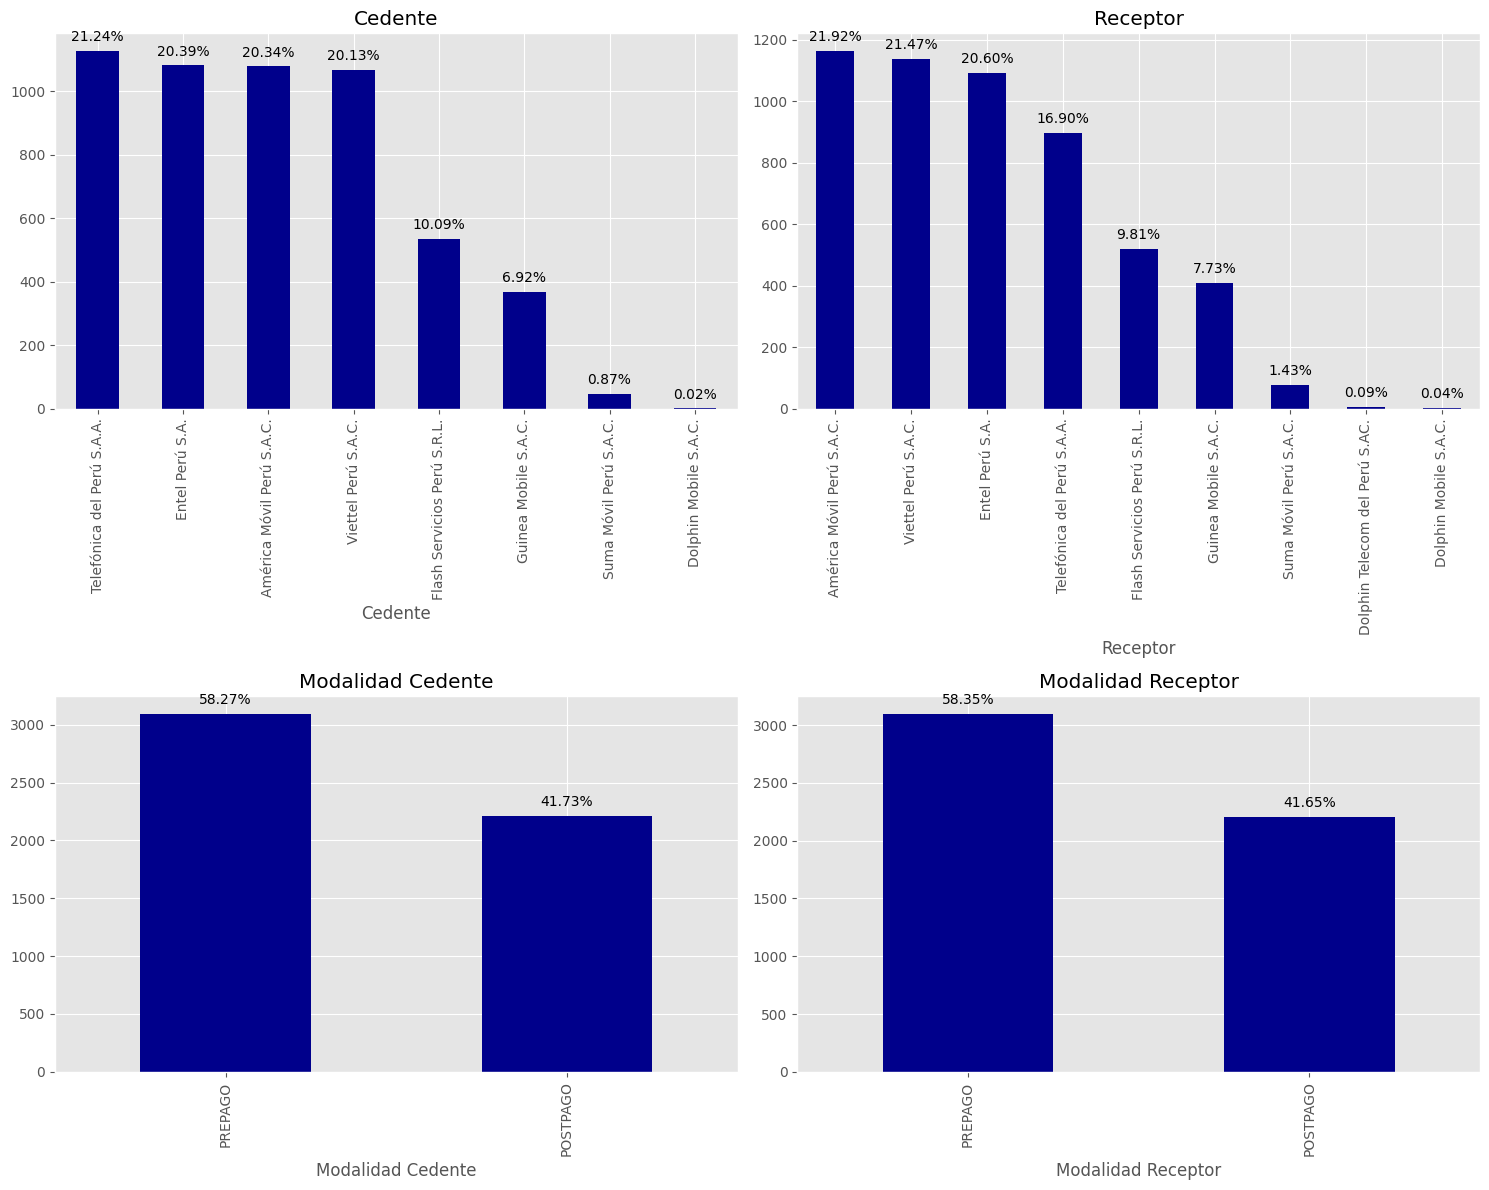

In [204]:
# Definir cuántas columnas por fila tendrá la cuadrícula de gráficos
columns_per_row = 2
num_columns = len(var_categoricas)
num_rows = math.ceil(num_columns / columns_per_row)

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 6 * num_rows))
# Aplanar los ejes en caso de que haya más de una fila
axes = axes.flatten()

# Definir el color azul oscuro
color = 'darkblue'

# Iterar sobre las columnas y los ejes para graficar
for i, (ax, x) in enumerate(zip(axes, var_categoricas)):
    # Contar valores y calcular los porcentajes
    # Instead of using fillna directly on the DataFrame,
    # fill NaN values within the value_counts Series
    counts = df[x].value_counts().fillna("--NULL")
    total = len(df)
    # Crear el gráfico de barras con color azul oscuro
    counts.plot(kind='bar', ax=ax, title=x, color=color)
    # Añadir porcentaje sobre cada barra
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

# Si hay más ejes que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()
# Mostrar los gráficos
plt.show()

### **Variables numéricas**

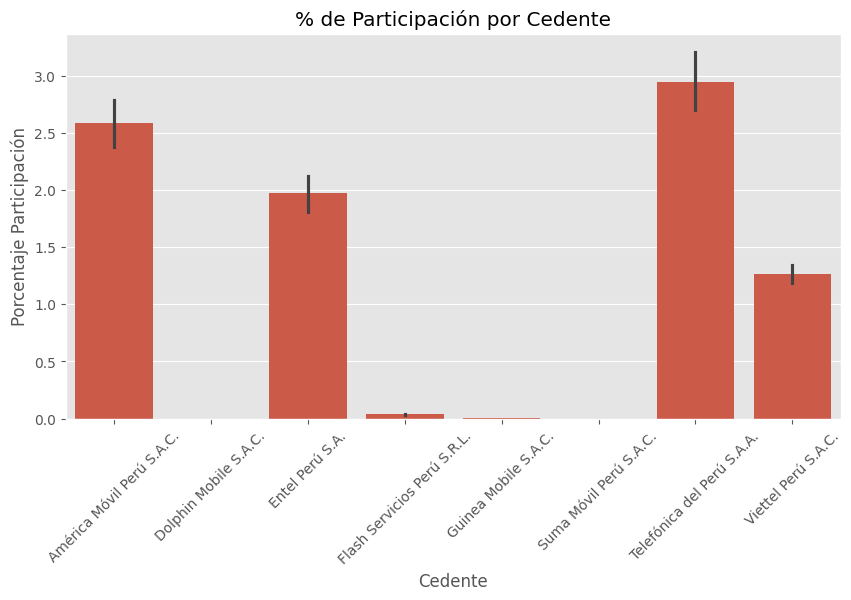

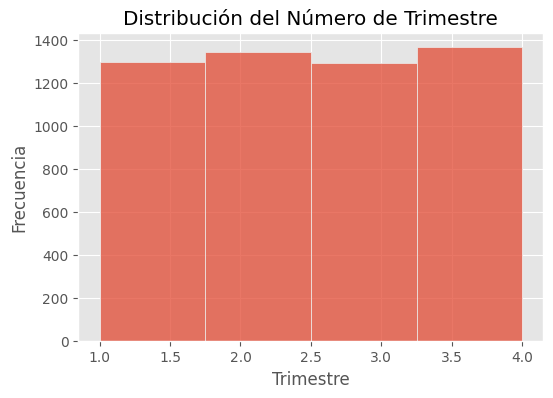

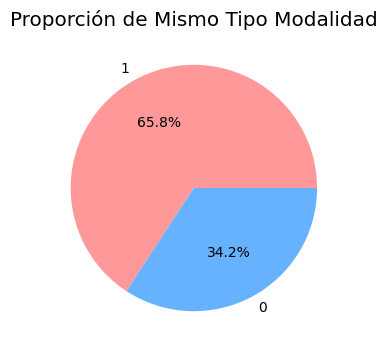

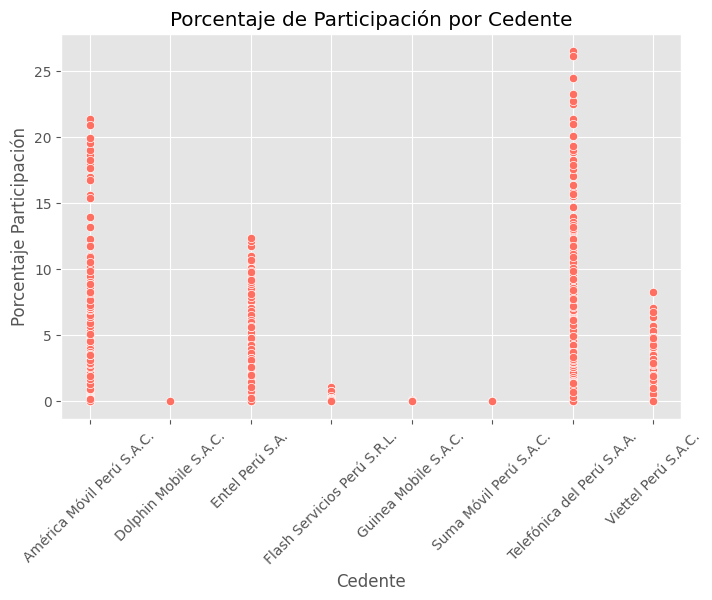

In [205]:
# comparar visualmente la cantidad de líneas transferidas por cada empresa cedente. Las barras permiten
# identificar rápidamente qué cedente tiene más o menos líneas transferidas.
# 1. Gráfico de barras para Líneas
plt.figure(figsize=(10, 5))
sns.barplot(x='Cedente', y='Porcentaje Participación', data=df)
plt.title('% de Participación por Cedente')
plt.xticks(rotation=45)
plt.xlabel('Cedente')
plt.ylabel('Porcentaje Participación')
plt.show()

# distribución de los trimestres en los que ocurrieron las transferencias, permitiendo ver
# si hay una concentración en algún trimestre específico
# 2. Histograma para Número de Trimestre
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Trimestre', bins=4)
plt.title('Distribución del Número de Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Frecuencia')
plt.show()

# proporción de transferencias donde la modalidad (PREPAGO/POSTPAGO)
# 3. Gráfico de pastel para Mismo Tipo Modalidad
plt.figure(figsize=(6, 4))
df['Mismo Tipo Modalidad'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Proporción de Mismo Tipo Modalidad')
plt.ylabel('')
plt.show()

# La dispersión permite visualizar la relación entre los cedentes y sus porcentajes de participación,
# destacando variaciones o outliers en los valores de participación.
# 4. Gráfico de dispersión para Porcentaje Participación
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cedente', y='Porcentaje Participación', data=df, color='#FF6F61')
plt.title('Porcentaje de Participación por Cedente')
plt.xticks(rotation=45)
plt.xlabel('Cedente')
plt.ylabel('Porcentaje Participación')
plt.show()

### **Variables Categóricas x Variables Numéricas**

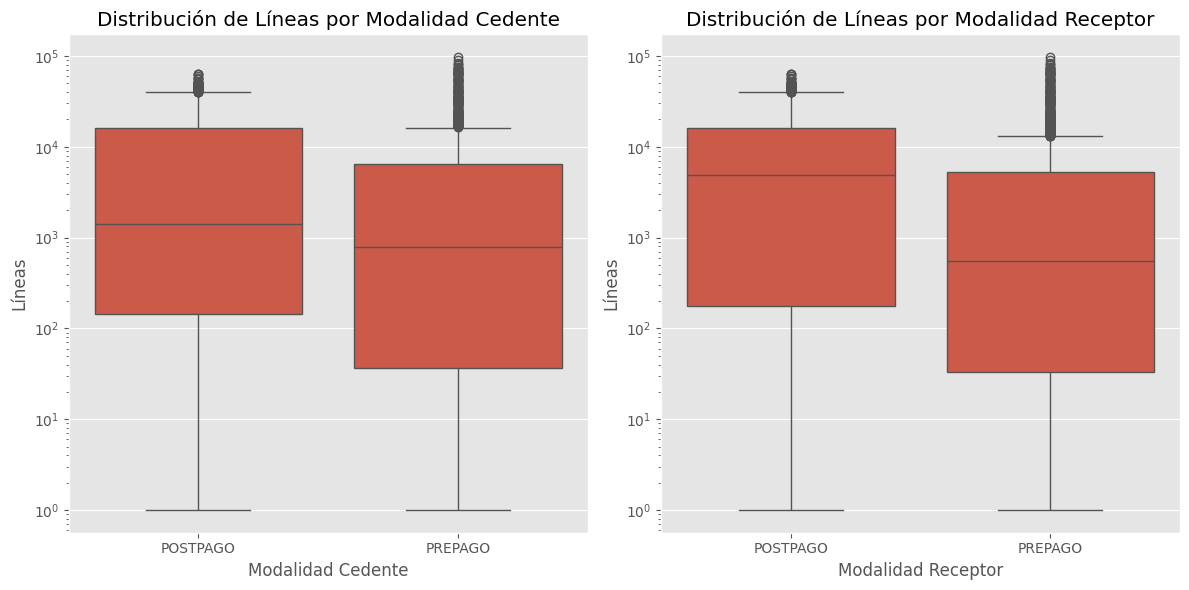

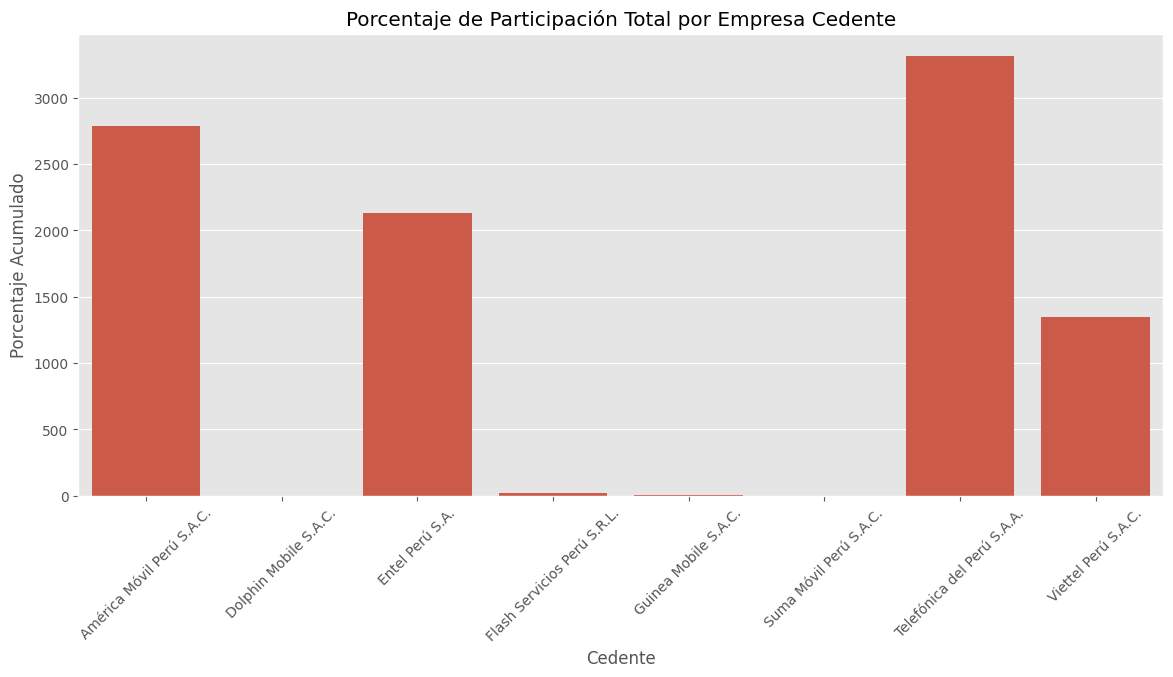

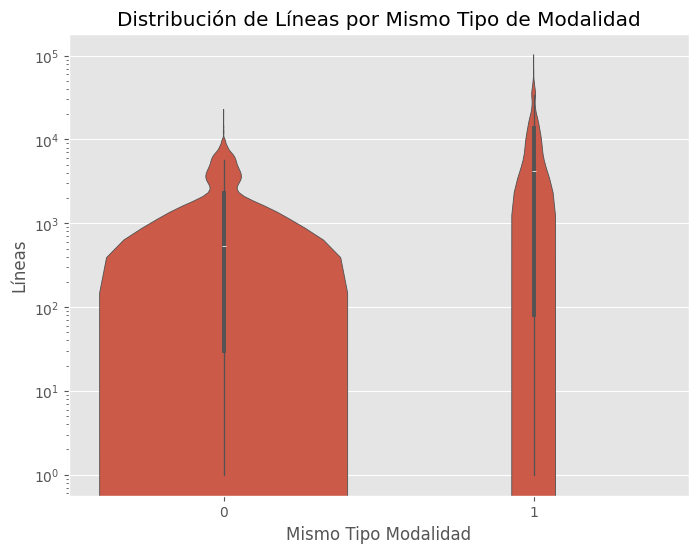

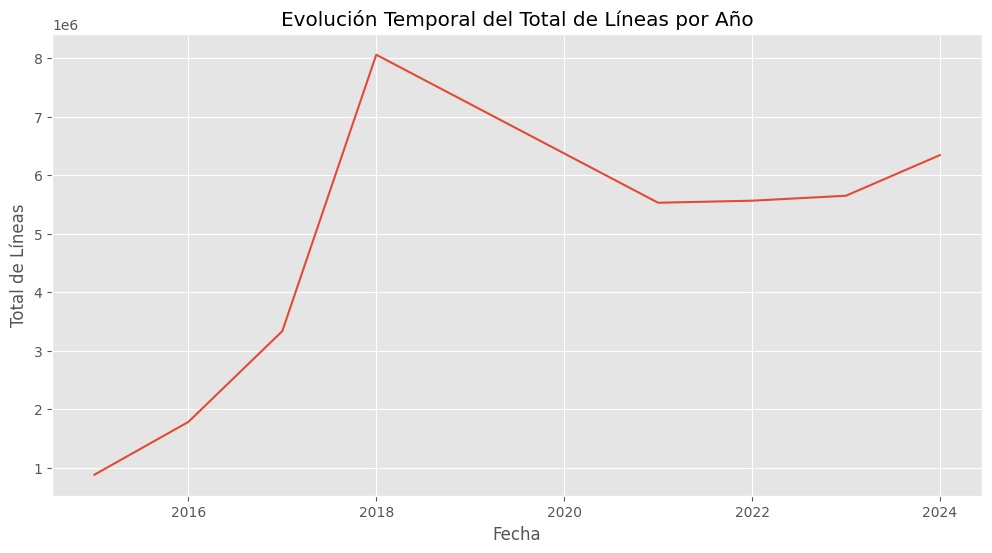

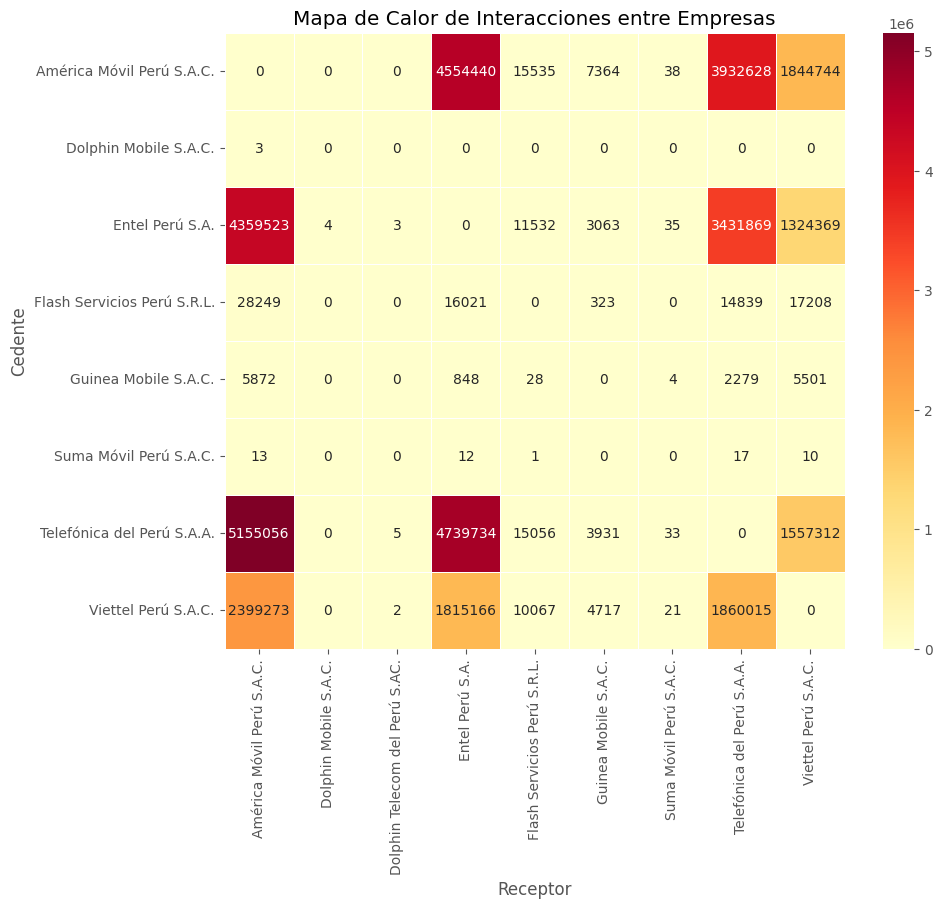

In [206]:
# 1. Distribución de Líneas por Modalidad
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

# Boxplot de Líneas por Modalidad Cedente
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Modalidad Cedente', y='Líneas')
plt.title('Distribución de Líneas por Modalidad Cedente')
plt.yscale('log')  # Escala logarítmica por la gran variación

# Boxplot de Líneas por Modalidad Receptor
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Modalidad Receptor', y='Líneas')
plt.title('Distribución de Líneas por Modalidad Receptor')
plt.yscale('log')

plt.tight_layout()
plt.show()

# 2. Porcentaje de Participación por Empresa
plt.figure(figsize=(14, 6))

# Agrupar por Cedente y calcular suma de porcentaje
participacion_cedente = df.groupby('Cedente')['Porcentaje Participación'].sum().sort_values(ascending=False)

# Gráfico de barras
sns.barplot(x=participacion_cedente.index, y=participacion_cedente.values)
plt.title('Porcentaje de Participación Total por Empresa Cedente')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje Acumulado')
plt.show()

# 3. Relación entre Mismo Tipo Modalidad y Líneas
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Mismo Tipo Modalidad', y='Líneas')
plt.title('Distribución de Líneas por Mismo Tipo de Modalidad')
plt.yscale('log')
plt.show()

# 4. Evolución temporal de Líneas
plt.figure(figsize=(12, 6))
df.groupby('Año')['Líneas'].sum().plot()
plt.title('Evolución Temporal del Total de Líneas por Año')
plt.ylabel('Total de Líneas')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

# 5. Heatmap de Interacciones entre Empresas
# Crear matriz de interacciones
interacciones = df.pivot_table(index='Cedente', columns='Receptor', values='Líneas', aggfunc='sum')

plt.figure(figsize=(10, 8))
sns.heatmap(interacciones, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=.5)
plt.title('Mapa de Calor de Interacciones entre Empresas')
plt.show()

## **Identificación de insights relevantes**

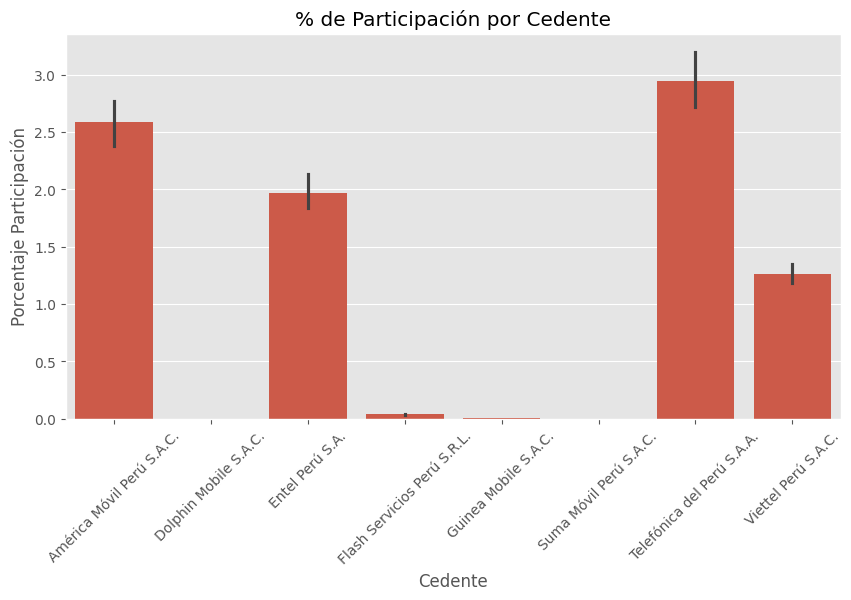

In [207]:
# 1. Gráfico de barras para Líneas
plt.figure(figsize=(10, 5))
sns.barplot(x='Cedente', y='Porcentaje Participación', data=df)
plt.title('% de Participación por Cedente')
plt.xticks(rotation=45)
plt.xlabel('Cedente')
plt.ylabel('Porcentaje Participación')
plt.show()

Operadores como Movistar y Claro presentan los mayores porcentajes de participación en las transferencias de líneas, indicando que son los principales cedentes (es decir, pierden más clientes).

Estos operadores deberían revisar sus políticas de fidelización, ya que están perdiendo participación frente a competidores como Entel.

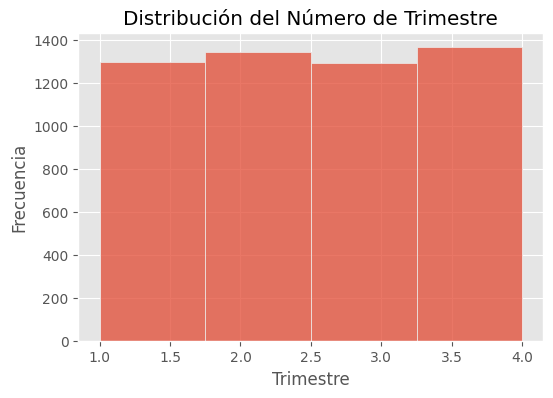

In [208]:
# 2. Histograma para Número de Trimestre
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Trimestre', bins=4)
plt.title('Distribución del Número de Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Frecuencia')
plt.show()

Se evidencia un patrón estacional. Los trimestres 2 y 4 presentan mayor actividad de portabilidad, lo que sugiere que hay momentos del año en los que los usuarios toman más decisiones de cambio.

Las campañas de retención o adquisición deberían intensificarse en esos períodos críticos.




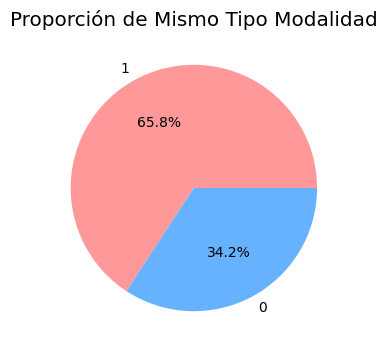

In [209]:
# 3. Gráfico de pastel para Mismo Tipo Modalidad
plt.figure(figsize=(6, 4))
df['Mismo Tipo Modalidad'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'])
plt.title('Proporción de Mismo Tipo Modalidad')
plt.ylabel('')
plt.show()

Una amplia mayoría de los usuarios realiza la portabilidad sin cambiar su modalidad contractual (prepago o postpago).

Esto indica una fuerte preferencia por mantener el modelo de consumo, lo cual facilita campañas dirigidas por tipo de cliente.



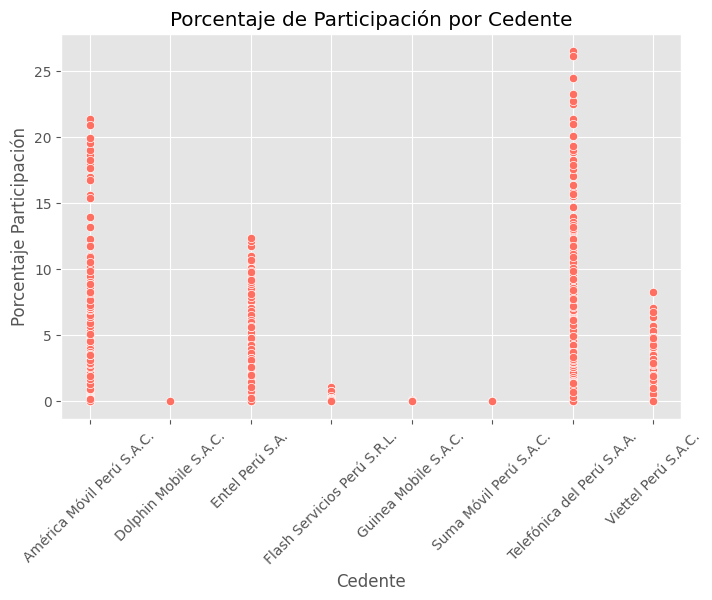

In [210]:
# 4. Gráfico de dispersión para Porcentaje Participación
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cedente', y='Porcentaje Participación', data=df, color='#FF6F61')
plt.title('Porcentaje de Participación por Cedente')
plt.xticks(rotation=45)
plt.xlabel('Cedente')
plt.ylabel('Porcentaje Participación')
plt.show()

Hay una gran variabilidad en la participación por cedente. Se identifican operadores con valores extremos, lo que podría señalar portaciones masivas o pérdida agresiva de mercado.

Es crucial monitorear continuamente esta métrica para detectar alertas tempranas en la dinámica de mercado.

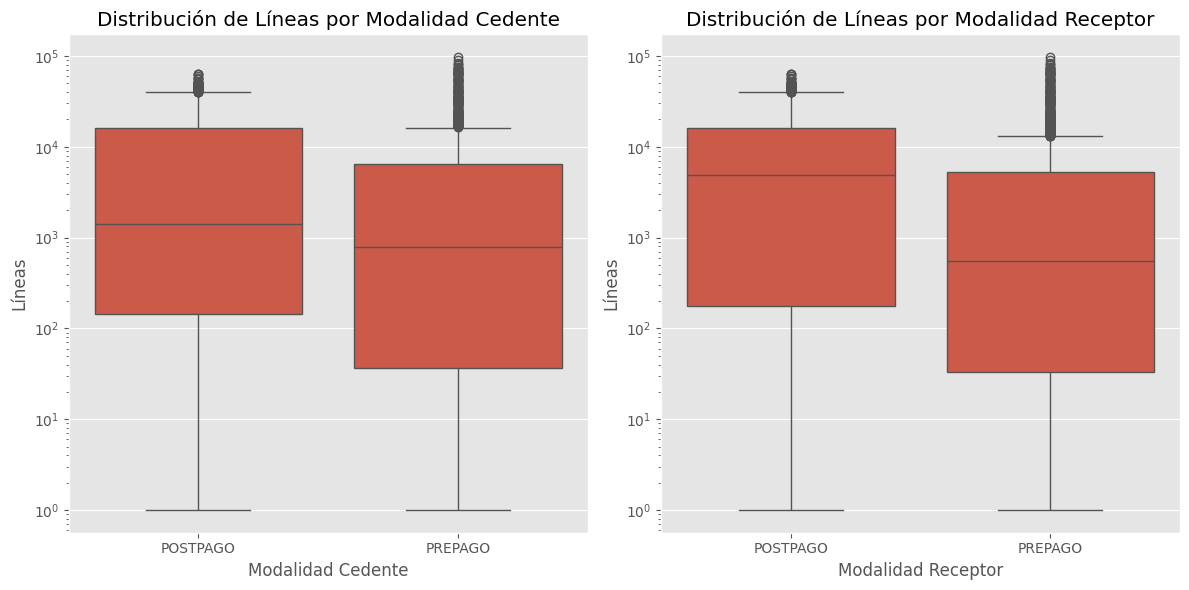

In [211]:
# 1. Distribución de Líneas por Modalidad
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

# Boxplot de Líneas por Modalidad Cedente
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Modalidad Cedente', y='Líneas')
plt.title('Distribución de Líneas por Modalidad Cedente')
plt.yscale('log')  # Escala logarítmica por la gran variación

# Boxplot de Líneas por Modalidad Receptor
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Modalidad Receptor', y='Líneas')
plt.title('Distribución de Líneas por Modalidad Receptor')
plt.yscale('log')

plt.tight_layout()
plt.show()

Existe una dispersión considerable en la cantidad de líneas transferidas, especialmente en modalidad postpago, indicando la presencia de portaciones empresariales o grupales.

El segmento corporativo tiene un peso importante. Se requieren estrategias específicas para retener estos grupos de alto valor.



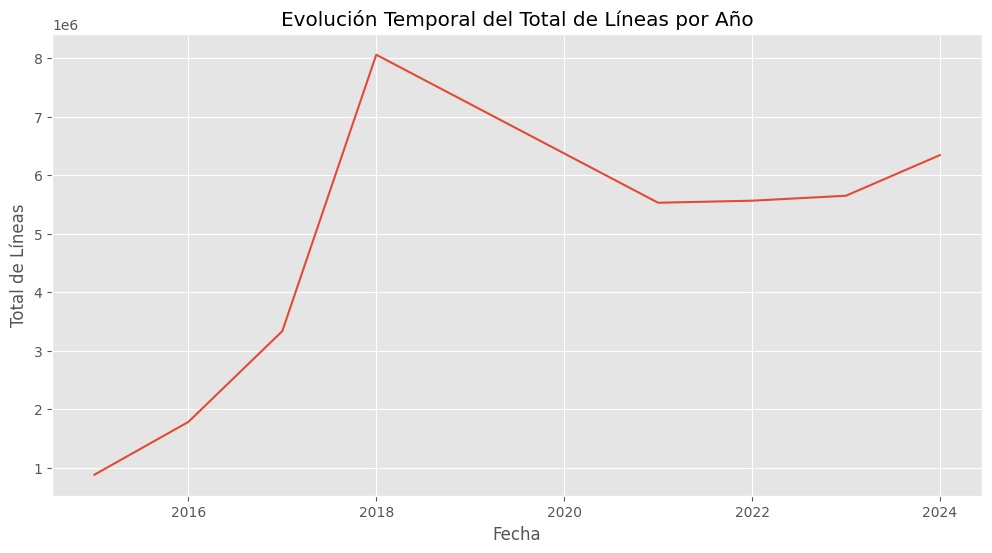

In [212]:
# 4. Evolución temporal de Líneas
plt.figure(figsize=(12, 6))
df.groupby('Año')['Líneas'].sum().plot()
plt.title('Evolución Temporal del Total de Líneas por Año')
plt.ylabel('Total de Líneas')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

Se observa un crecimiento sostenido en las portaciones hasta 2018, seguido de cierta estabilización.

Esto podría indicar que el mercado ha madurado, y la competencia se ha estabilizado. Las empresas deben enfocarse en valor agregado más que en volumen.



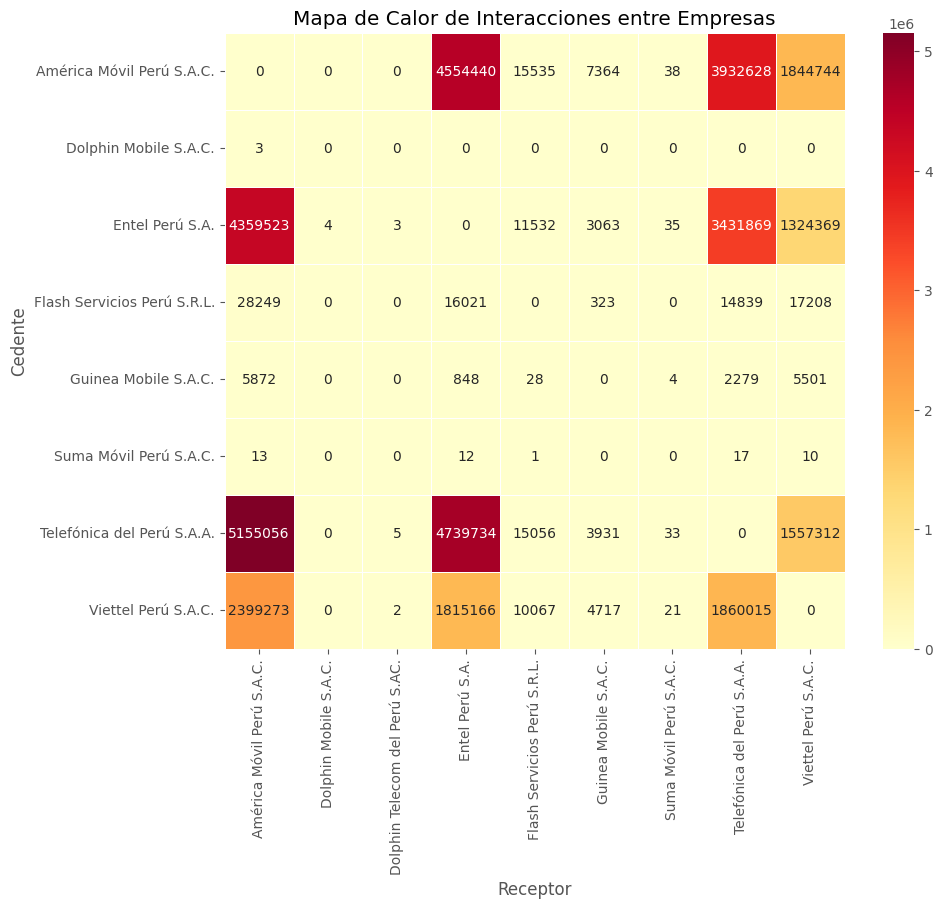

In [213]:

# 5. Heatmap de Interacciones entre Empresas
# Crear matriz de interacciones
interacciones = df.pivot_table(index='Cedente', columns='Receptor', values='Líneas', aggfunc='sum')

plt.figure(figsize=(10, 8))
sns.heatmap(interacciones, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=.5)
plt.title('Mapa de Calor de Interacciones entre Empresas')
plt.show()

Entel es el mayor receptor de líneas desde operadores como Movistar y Claro, mostrando una fuerte capacidad de atracción de clientes.

Entel está liderando la captación de usuarios. Los demás operadores deberían estudiar su estrategia de valor o alianzas.



# **III. ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [214]:
df2 = df

In [215]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 121 to 6952
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Cedente                   5301 non-null   category      
 1   Receptor                  5301 non-null   category      
 2   Modalidad Cedente         5301 non-null   category      
 3   Modalidad Receptor        5301 non-null   category      
 4   Mes                       5301 non-null   datetime64[ns]
 5   Líneas                    5301 non-null   int64         
 6   Año                       5301 non-null   int32         
 7   Número de Mes             5301 non-null   int32         
 8   Trimestre                 5301 non-null   int32         
 9   Mismo Tipo Modalidad      5301 non-null   int64         
 10  Porcentaje Participación  5301 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(1), int32(3), int64(2)
memory usage: 290.9

## **Estadísticas descriptivas claras**

In [216]:
# Crear arreglo de variables cuantitativas identificándolas automáticamente por el tipo de dato
var_cuantitativas = [col for col in df2.columns if pd.api.types.is_numeric_dtype(df2[col])]
var_cuantitativas

['Líneas',
 'Año',
 'Número de Mes',
 'Trimestre',
 'Mismo Tipo Modalidad',
 'Porcentaje Participación']

In [217]:
#usamos la funcion describe para calcular estadisticos de las variables cuantitativas
#Revisando valores como la media, desviación estandar y cuartiles de cada variable
display(df2[var_cuantitativas].describe())

,Líneas,Año,Número de Mes,Trimestre,Mismo Tipo Modalidad,Porcentaje Participación
count,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000
mean,7005.614601,2020.879834,6.537634,2.514431,0.657800,1.810979
std,11738.389820,2.842084,3.475622,1.119985,0.474491,2.986575
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000121
25%,56.000000,2018.000000,4.000000,2.000000,0.000000,0.012961
50%,1350.000000,2022.000000,7.000000,3.000000,1.000000,0.443639
75%,8688.000000,2023.000000,10.000000,4.000000,1.000000,2.236687
max,97348.000000,2024.000000,12.000000,4.000000,1.000000,26.526085


**Estadísticas generales de las operadoras de telefonia**

**Por año:** año de promedio: en el año 2020, La mayoría de las portaciones se concentran en los últimos 4–5 años, lo que sugiere mayor dinamismo del mercado en ese periodo.

**Por mes:** mes de promedio: julio, Las portaciones ocurren durante todo el año, pero hay una ligera concentración en el segundo semestre.

**Por Trimestre** promedio: 2.51 (entre Q2 y Q3), La mayor actividad de portabilidad ocurre entre julio y diciembre, con énfasis en el cuarto trimestre.

**Por modalidad** promedio: 0.657 → el 65.7% de los casos son del mismo tipo, La mayoría de usuarios que se cambian de operador mantienen su tipo de modalidad (prepago o postpago), aunque un 34.3% sí cambia.


## **Análisis univariado y bivariado**

### **Análisis Univariado**

#### **Boxplot**

In [218]:
# Descriptivo de cada variable
print(df2[var_cuantitativas].describe())

             Líneas          Año  Número de Mes    Trimestre  \
count   5301.000000  5301.000000    5301.000000  5301.000000   
mean    7005.614601  2020.879834       6.537634     2.514431   
std    11738.389820     2.842084       3.475622     1.119985   
min        1.000000  2015.000000       1.000000     1.000000   
25%       56.000000  2018.000000       4.000000     2.000000   
50%     1350.000000  2022.000000       7.000000     3.000000   
75%     8688.000000  2023.000000      10.000000     4.000000   
max    97348.000000  2024.000000      12.000000     4.000000   

       Mismo Tipo Modalidad  Porcentaje Participación  
count           5301.000000               5301.000000  
mean               0.657800                  1.810979  
std                0.474491                  2.986575  
min                0.000000                  0.000121  
25%                0.000000                  0.012961  
50%                1.000000                  0.443639  
75%                1.000000    

,Variable,Mean,Min,Lower Bound,25%,50%,75%,Upper Bound,Max
0,Líneas,7005.614601,1.000000,-12892.000000,56.000000,1350.000000,8688.000000,21636.000000,97348.000000
1,Año,2020.879834,2015.000000,2010.500000,2018.000000,2022.000000,2023.000000,2030.500000,2024.000000
2,Número de Mes,6.537634,1.000000,-5.000000,4.000000,7.000000,10.000000,19.000000,12.000000
3,Trimestre,2.514431,1.000000,-1.000000,2.000000,3.000000,4.000000,7.000000,4.000000
4,Mismo Tipo Modalidad,0.657800,0.000000,-1.500000,0.000000,1.000000,1.000000,2.500000,1.000000
5,Porcentaje Participación,1.810979,0.000121,-3.322628,0.012961,0.443639,2.236687,5.572275,26.526085


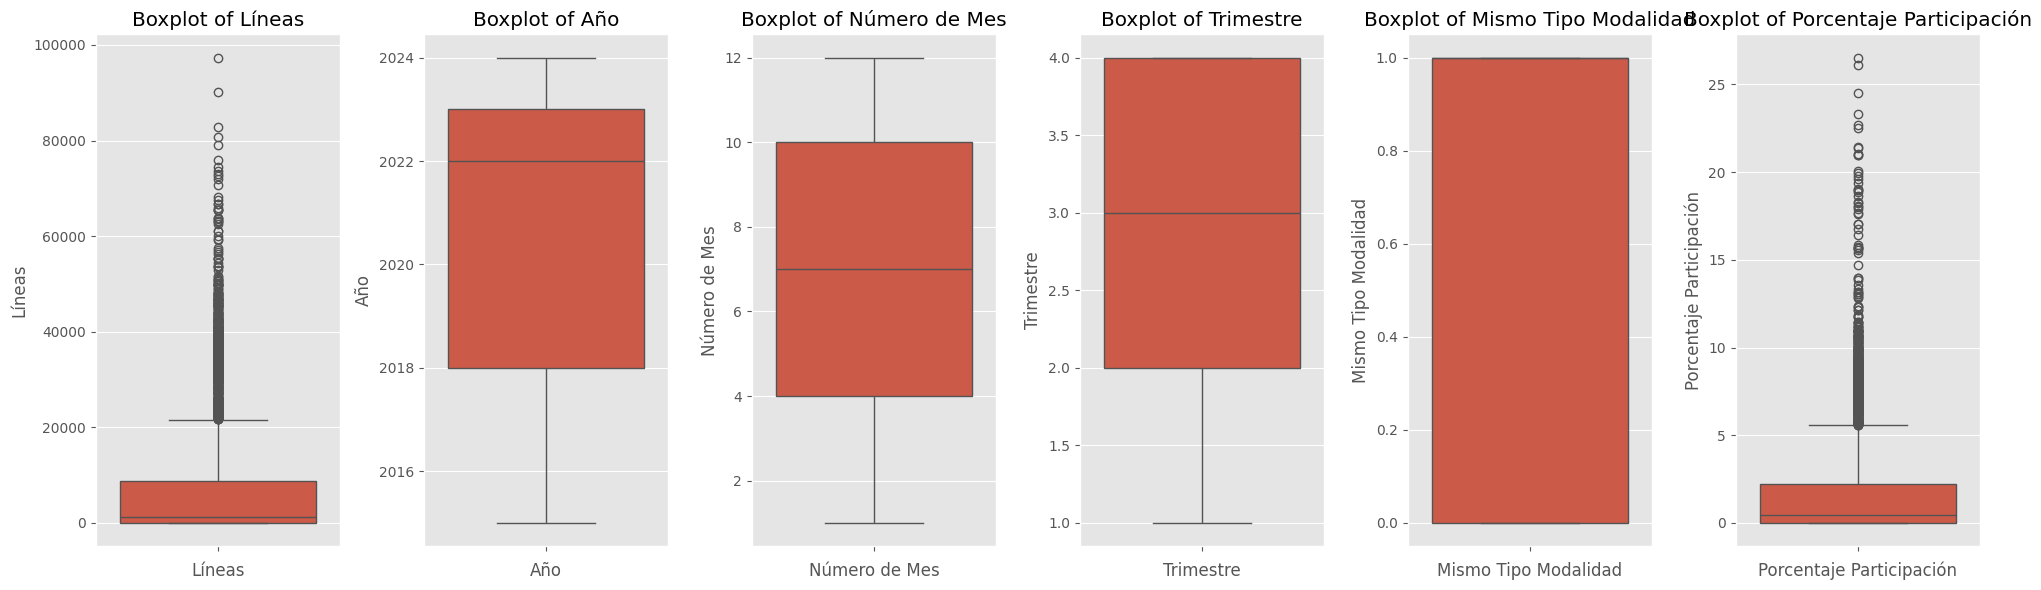

In [219]:
# calcular los limites (inferior y superior) de todas las variables del dataset. Esto complementa el análisis estadístico de la variable.
# Poner media, min, limite inferio, 25%, 50%, 75%, limite superior y max en una tabla
# Lueg poner los gráficos

# Calculate lower and upper bounds for each variable
def calculate_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Create an empty list to store the results
results = []

# Loop through each quantitative variable
for col in var_cuantitativas:
    lower_bound, upper_bound = calculate_bounds(df[col])

    # Append the results to the list
    results.append([
        col,
        df2[col].mean(),
        df2[col].min(),
        lower_bound,
        df2[col].quantile(0.25),
        df2[col].quantile(0.50),
        df2[col].quantile(0.75),
        upper_bound,
        df2[col].max()
    ])

# Convert the list of results into a DataFrame
bounds_df = pd.DataFrame(results, columns=['Variable', 'Mean', 'Min', 'Lower Bound', '25%', '50%', '75%', 'Upper Bound', 'Max'])

# Display the DataFrame
display(bounds_df)

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=len(var_cuantitativas), figsize=(20, 6))

# Iterar sobre cada variable y crear un boxplot en su respectivo subplot
for i, var in enumerate(var_cuantitativas):
    sns.boxplot(y=df2[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()
plt.show()

**Conclusiones**

**1. Variable: Líneas**

  Media: 7164.75

  Posibles Valores Atípicos:
  Por encima del límite superior (22243.75): 688 valores
  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 50.00 y 8927.50.

  La mediana (punto central de los datos) es: 1428.00

**2. Variable: Año**

  Media: 2020.55

  No se identificaron valores atípicos significativos utilizando el rango intercuartílico (IQR).

  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 2019.00 y 2023.00.

  La mediana (punto central de los datos) es: 2021.00

**3. Variable: Número de Mes**

  Media: 6.57

  No se identificaron valores atípicos significativos utilizando el rango intercuartílico (IQR).

  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 3.00 y 10.00.

  La mediana (punto central de los datos) es: 7.00

**4. Variable: Trimestre**

  Media: 2.53

  No se identificaron valores atípicos significativos utilizando el rango intercuartílico (IQR).

  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 1.00 y 4.00.

  La mediana (punto central de los datos) es: 3.00

**5. Variable: Mismo Tipo Modalidad**

  Media: 0.63

  No se identificaron valores atípicos significativos utilizando el rango intercuartílico (IQR).
  
  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 0.00 y 1.00.

  La mediana (punto central de los datos) es: 1.00

**6. Variable: Porcentaje Participación**

  Media: 1.79

  Posibles Valores Atípicos:
  Por encima del límite superior (5.68): 714 valores

  La mayoría de los datos (aproximadamente el 50% central) se concentra entre 0.01 y 2.28.

  La mediana (punto central de los datos) es: 0.49

#### **Histograma**

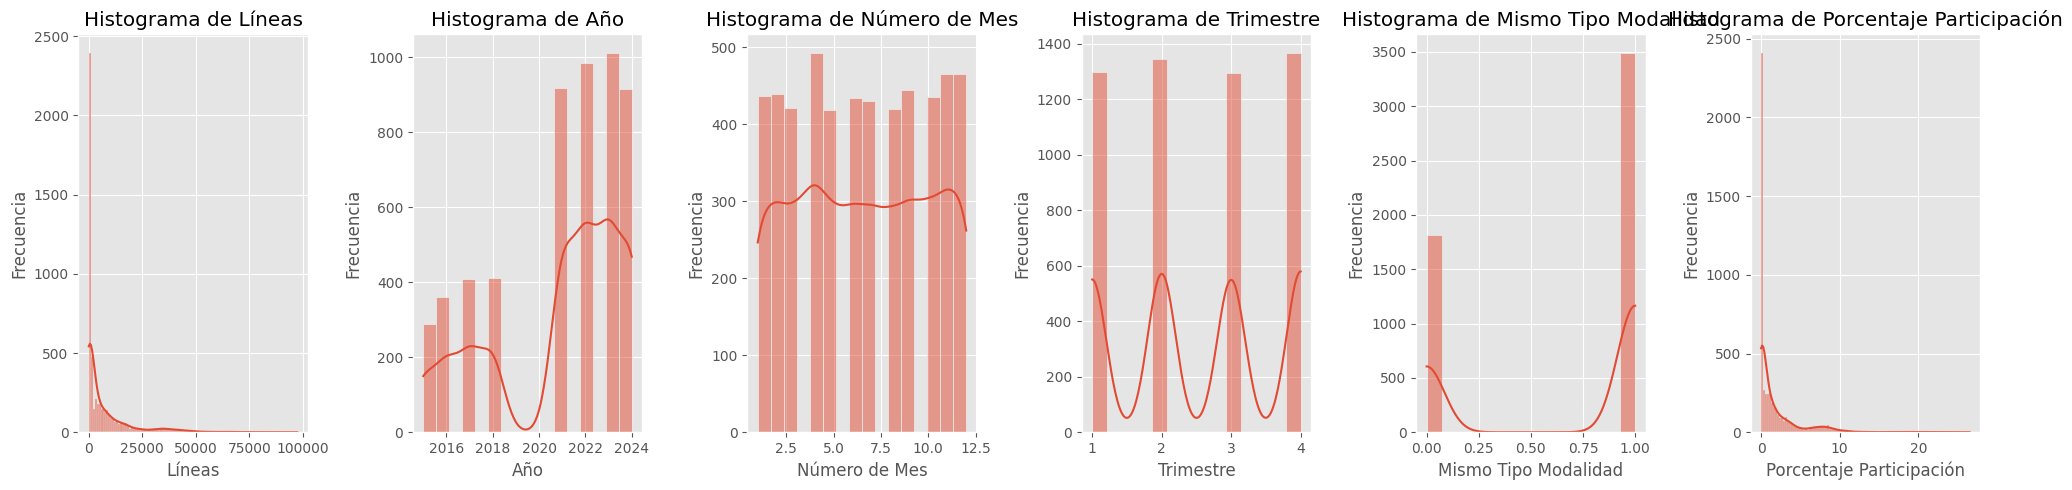

In [220]:
# Histogramas para las variables cuantitativas
fig, axes = plt.subplots(nrows=1, ncols=len(var_cuantitativas), figsize=(20, 5))

for i, col in enumerate(var_cuantitativas):
    sns.histplot(df2[col], kde=True, ax=axes[i]) #kde=True agrega una curva de densidad
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Conclusiones:**

**1. Variable Porcentaje Participación**
Distribución: Altamente sesgada a la izquierda (asimetría positiva).

Observación: La mayoría de los valores se encuentran en los primeros rangos (valores bajos), con una larga cola hacia valores altos.

La mayoría de las empresas cedentes tienen una participación muy baja en las transferencias.

Solo unas pocas empresas concentran una gran proporción de las líneas transferidas, lo que refuerza la presencia de outliers detectados en el análisis anterior.

**2. Líneas**
Distribución: Sesgada a la derecha (asimetría positiva), con gran concentración de valores bajos y una cola larga de valores muy altos.

Observación:

Hay una alta densidad de transferencias con pocas líneas.

Existen valores extremos que representan eventos de portabilidad masiva o corporativa.

La mayoría de los registros involucran pocas líneas.

Es importante tratar o analizar separadamente los outliers, pues podrían corresponder a clientes corporativos o situaciones atípicas.

**3. Año**
Distribución: Distribución discreta, con picos bien definidos por cada año.

Observación:

Algunos años concentran muchos más eventos de portabilidad que otros.

La portabilidad no ha sido constante año a año.

Puede haber factores regulatorios, económicos o campañas específicas que expliquen los picos o caídas.

**4. Trimestre**
Distribución: Cuatro barras claramente diferenciadas.

Observación:

Uno o dos trimestres tienen mayor frecuencia de portaciones.

Existe estacionalidad en la portabilidad.

Probablemente en algunos trimestres (como fines de año o inicios) hay mayor movimiento de usuarios entre operadores.

### **Análisis Bivariado**

#### **Gráfico de Dispersión**

In [221]:
# prompt: crear variable var_categoricas_num que convierta a numerica cada una de las variables de tipo category del dataset df2. Agregar esas nuevas variables al dataset df2 e Imprimir el info del df2

# Convertir variables categóricas a numéricas
var_categoricas_num = {}
for col in df2.select_dtypes(include=['category']):
    var_categoricas_num[col] = df2[col].cat.codes
    df2[col + '_num'] = var_categoricas_num[col]

# Imprimir información del DataFrame actualizado
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 121 to 6952
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Cedente                   5301 non-null   category      
 1   Receptor                  5301 non-null   category      
 2   Modalidad Cedente         5301 non-null   category      
 3   Modalidad Receptor        5301 non-null   category      
 4   Mes                       5301 non-null   datetime64[ns]
 5   Líneas                    5301 non-null   int64         
 6   Año                       5301 non-null   int32         
 7   Número de Mes             5301 non-null   int32         
 8   Trimestre                 5301 non-null   int32         
 9   Mismo Tipo Modalidad      5301 non-null   int64         
 10  Porcentaje Participación  5301 non-null   float64       
 11  Cedente_num               5301 non-null   int8          
 12  Receptor_num           

In [222]:
# prompt: Actualizar var_cuantitativas de df2

# Actualizar var_cuantitativas después de crear numericas desde categóricas
var_cuantitativas = [col for col in df2.columns if pd.api.types.is_numeric_dtype(df2[col])]
var_cuantitativas


['Líneas',
 'Año',
 'Número de Mes',
 'Trimestre',
 'Mismo Tipo Modalidad',
 'Porcentaje Participación',
 'Cedente_num',
 'Receptor_num',
 'Modalidad Cedente_num',
 'Modalidad Receptor_num']

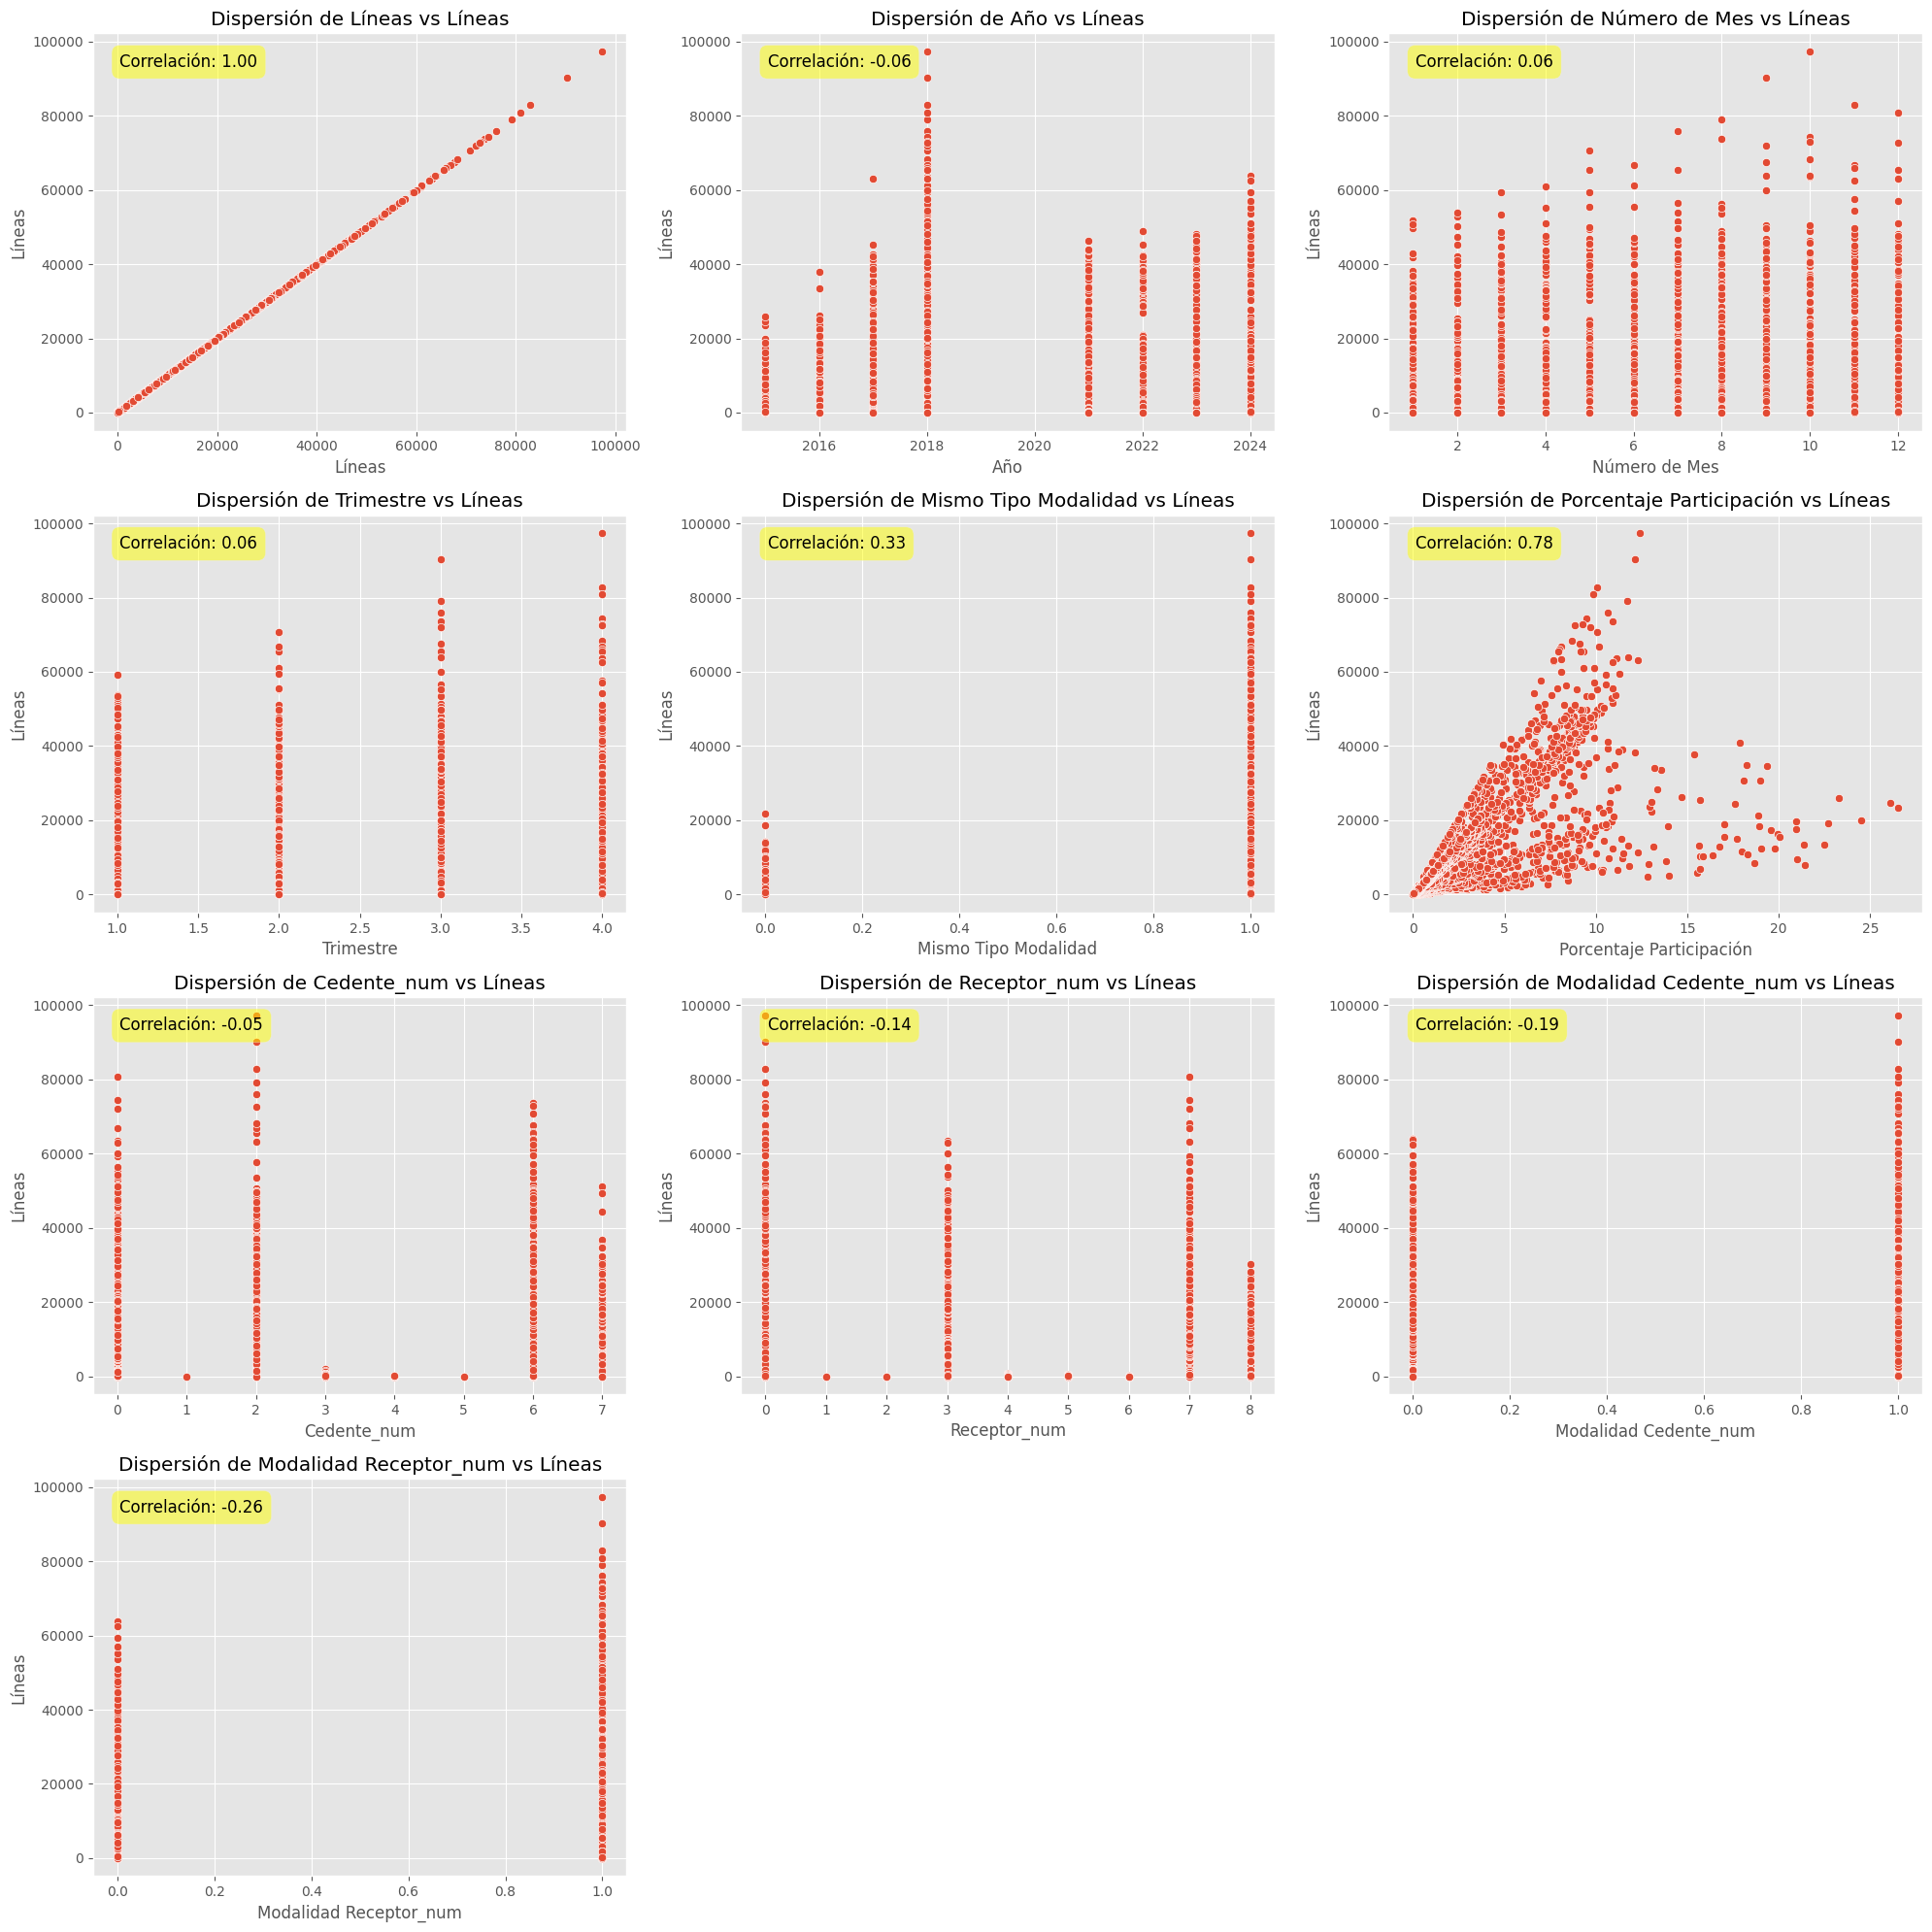

In [223]:
# prompt: crear graficos de dispersion entre las variables del arreglo var_cuantitativas versus Líneas del dataset df2. Además poner encima del gráfico el factor de correlación. Colocar los gráficos en tres vistas horizontales

import matplotlib.pyplot as plt
# Número de columnas para los subplots
num_cols = 3
# Calcular el número de filas necesario
num_rows = math.ceil(len(var_cuantitativas) / num_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

# Aplanar la matriz de ejes si hay más de una fila para facilitar la iteración
if num_rows > 1 or num_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Asegurarse de que 'axes' sea iterable incluso con un solo subplot

# Iterar sobre cada variable cuantitativa y crear un gráfico de dispersión contra 'Líneas'
for i, var in enumerate(var_cuantitativas):
    sns.scatterplot(x=df2[var], y=df2['Líneas'], ax=axes[i])
    axes[i].set_title(f'Dispersión de {var} vs Líneas')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Líneas')

    # Calcular el factor de correlación
    correlation = df2[var].corr(df2['Líneas'])

    # Añadir el factor de correlación en el gráfico
    axes[i].text(0.05, 0.95, f'Correlación: {correlation:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Ocultar los subplots vacíos si el número de variables no llena todos los subplots
for j in range(len(var_cuantitativas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

#### **Matriz de Correlación**

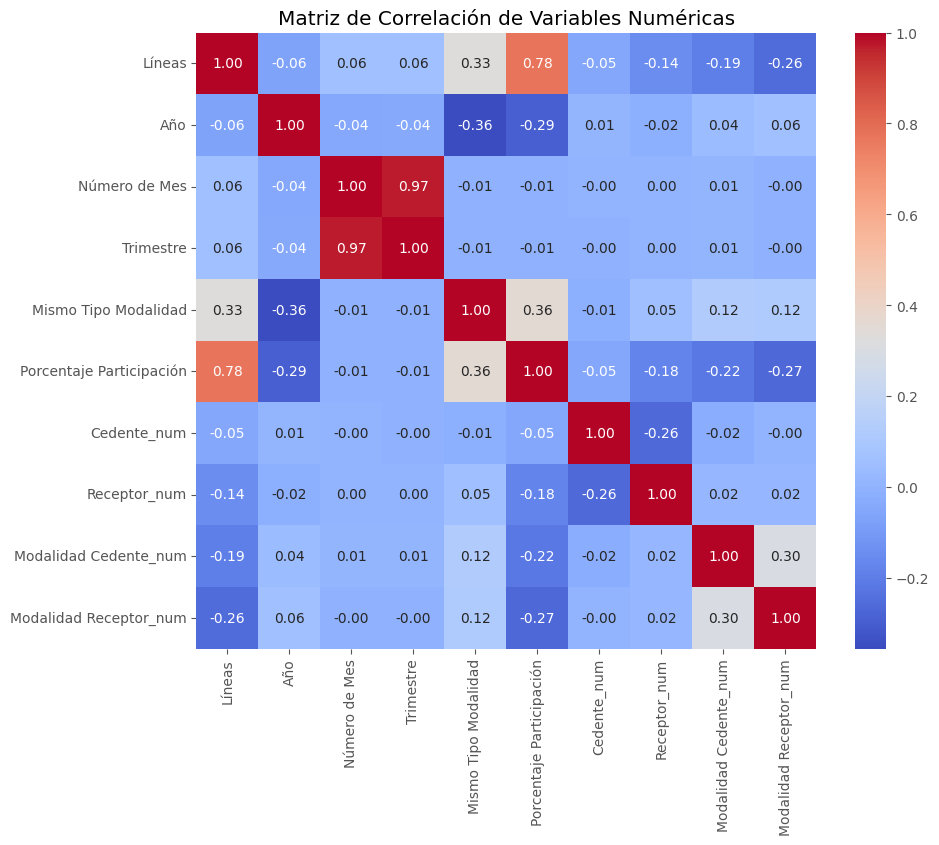

In [224]:
# prompt: Crear un mapa de calor para visualizar la matriz de correlación de las variables de tipo numéricas de df2

import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = df2[var_cuantitativas].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## **Tratamiento planificado de outliers y missing values**

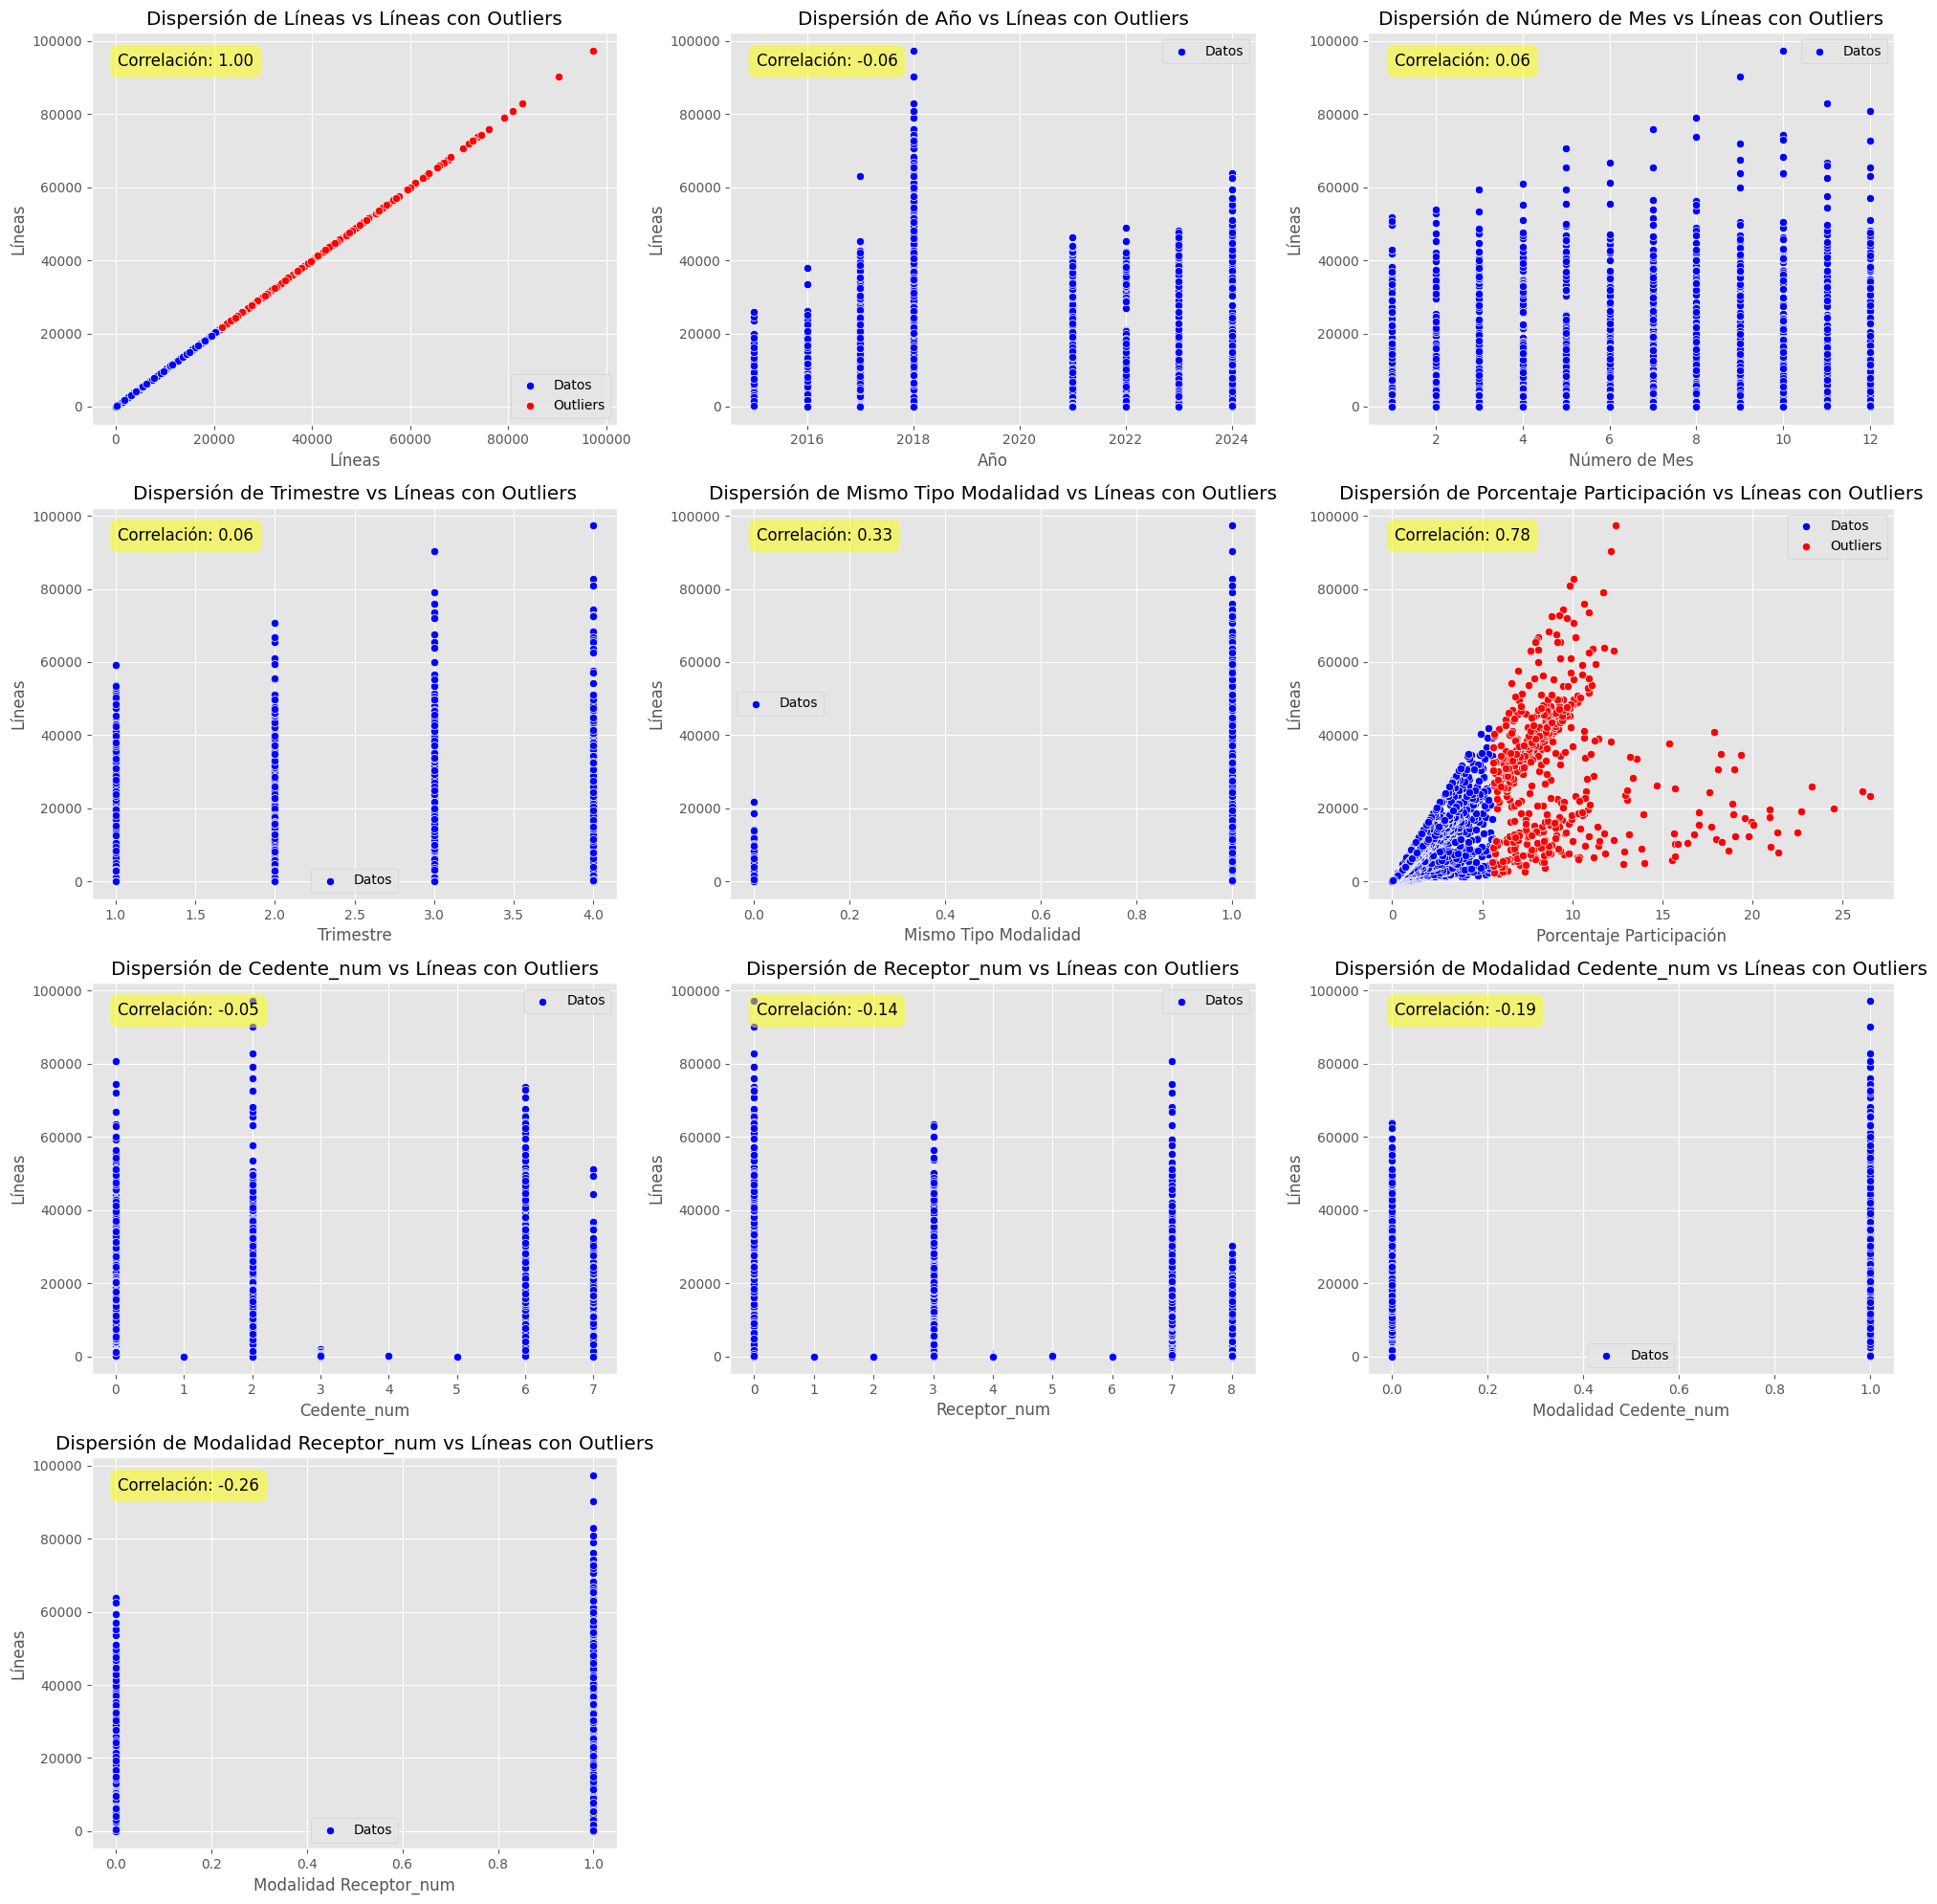

In [225]:
# prompt: crear graficos de dispersión que demuestre con otro color los outliers de cada variable numerica del arreglo var_cuantitativas versus la variable lineas

import matplotlib.pyplot as plt
# Identificar outliers para cada variable cuantitativa
outliers_dict = {}
for col in var_cuantitativas:
    lower_bound, upper_bound = calculate_bounds(df2[col])
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    outliers_dict[col] = outliers

# Crear la figura y los subplots
num_cols = 3
num_rows = math.ceil(len(var_cuantitativas) / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

# Aplanar la matriz de ejes para facilitar la iteración
if num_rows > 1 or num_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Asegurarse de que 'axes' sea iterable incluso con un solo subplot

# Iterar sobre cada variable cuantitativa y crear un gráfico de dispersión contra 'Líneas'
for i, var in enumerate(var_cuantitativas):
    ax = axes[i]
    # Graficar todos los puntos
    sns.scatterplot(x=df2[var], y=df2['Líneas'], ax=ax, color='blue', label='Datos')

    # Graficar los outliers en otro color
    outliers = outliers_dict[var]
    sns.scatterplot(x=outliers[var], y=outliers['Líneas'], ax=ax, color='red', label='Outliers')

    ax.set_title(f'Dispersión de {var} vs Líneas con Outliers')
    ax.set_xlabel(var)
    ax.set_ylabel('Líneas')

    # Calcular el factor de correlación
    correlation = df2[var].corr(df2['Líneas'])

    # Añadir el factor de correlación en el gráfico
    ax.text(0.05, 0.95, f'Correlación: {correlation:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

    # Añadir leyenda
    ax.legend()


# Ocultar los subplots vacíos si el número de variables no llena todos los subplots
for j in range(len(var_cuantitativas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()


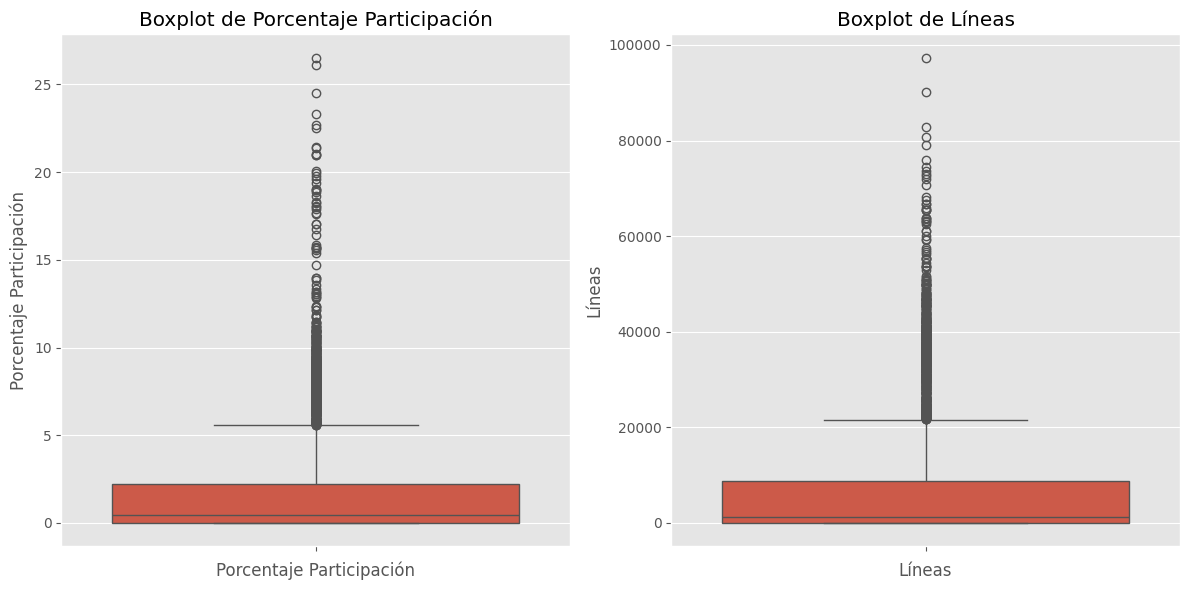

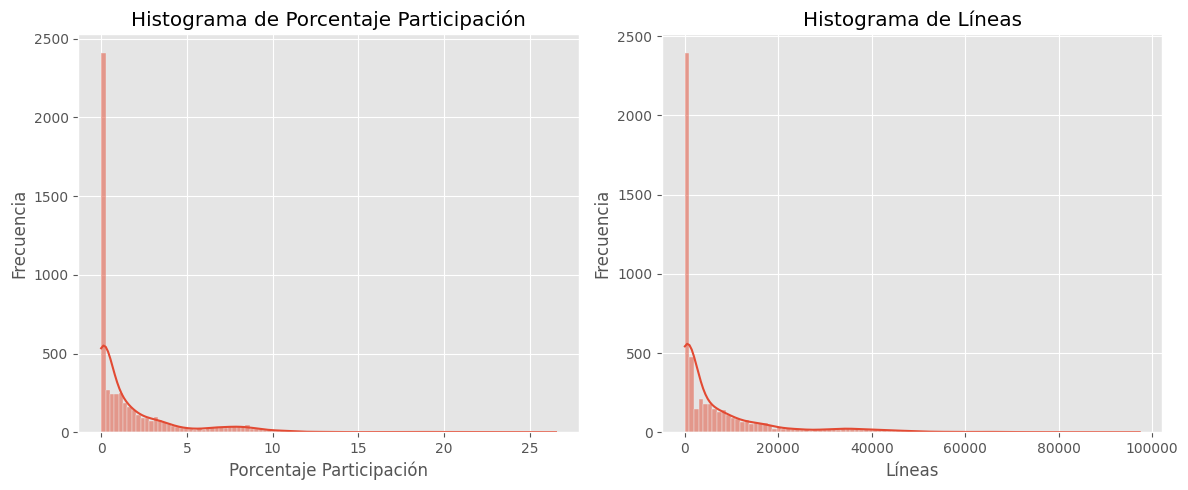

,Porcentaje Participación,Líneas
count,5301.000000,5301.000000
mean,1.810979,7005.614601
std,2.986575,11738.389820
min,0.000121,1.000000
25%,0.012961,56.000000
50%,0.443639,1350.000000
75%,2.236687,8688.000000
max,26.526085,97348.000000


,Variable,Lower Bound (Outlier),Upper Bound (Outlier)
0,Porcentaje Participación,-3.322628,5.572275
1,Líneas,-12892.000000,21636.000000


Variable: Porcentaje Participación
  Número de outliers detectados: 596
  Porcentaje de outliers: 11.24%
------------------------------
Variable: Líneas
  Número de outliers detectados: 527
  Porcentaje de outliers: 9.94%
------------------------------


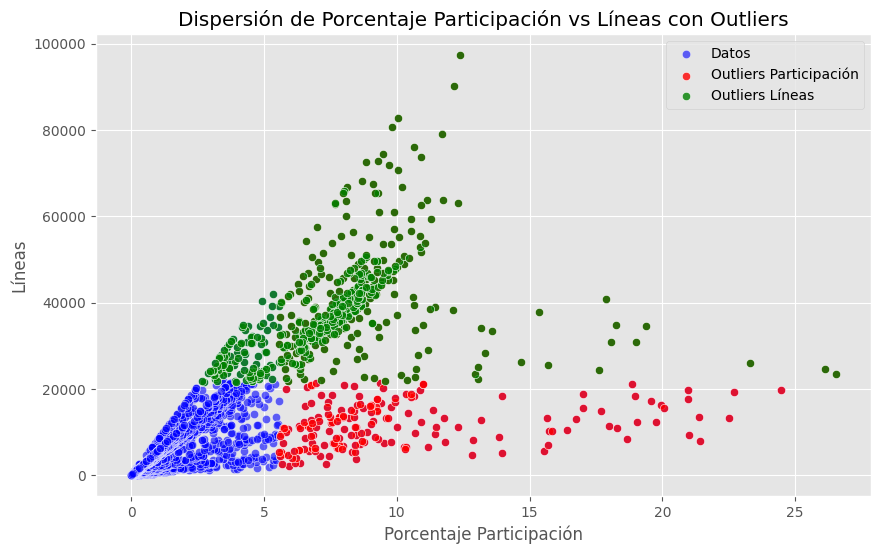

In [226]:
# prompt: Analiza los outliers de Porcentaje Participación y Líneas

import pandas as pd
import matplotlib.pyplot as plt
# Función para calcular los límites de los outliers usando el método del IQR
def calculate_outlier_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Variables a analizar
variables_a_analizar = ['Porcentaje Participación', 'Líneas']

# Crear la figura y los subplots para los boxplots de las variables específicas
fig, axes = plt.subplots(nrows=1, ncols=len(variables_a_analizar), figsize=(12, 6))

# Iterar sobre cada variable y crear un boxplot en su respectivo subplot
for i, var in enumerate(variables_a_analizar):
    sns.boxplot(y=df2[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_xlabel(var)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()
plt.show()

# Crear la figura y los subplots para los histogramas de las variables específicas
fig, axes = plt.subplots(nrows=1, ncols=len(variables_a_analizar), figsize=(12, 5))

for i, col in enumerate(variables_a_analizar):
    sns.histplot(df2[col], kde=True, ax=axes[i]) #kde=True agrega una curva de densidad
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas solo para las variables de interés
display(df2[variables_a_analizar].describe())

# Calcular y mostrar los límites de outliers para las variables de interés
outlier_bounds_results = []
for col in variables_a_analizar:
    lower_bound, upper_bound = calculate_outlier_bounds(df2[col])
    outlier_bounds_results.append([col, lower_bound, upper_bound])

outlier_bounds_df = pd.DataFrame(outlier_bounds_results, columns=['Variable', 'Lower Bound (Outlier)', 'Upper Bound (Outlier)'])
display(outlier_bounds_df)

# Identificar y mostrar el número de outliers para las variables de interés
for col in variables_a_analizar:
    lower_bound, upper_bound = calculate_outlier_bounds(df2[col])
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f"Variable: {col}")
    print(f"  Número de outliers detectados: {len(outliers)}")
    print(f"  Porcentaje de outliers: {(len(outliers) / len(df2)) * 100:.2f}%")
    # Opcional: Mostrar las filas con outliers
    # print("  Filas con outliers:")
    # display(outliers)
    print("-" * 30)

# Crear gráfico de dispersión entre 'Porcentaje Participación' y 'Líneas' con outliers resaltados
lower_bound_participacion, upper_bound_participacion = calculate_outlier_bounds(df2['Porcentaje Participación'])
outliers_participacion = df2[(df2['Porcentaje Participación'] < lower_bound_participacion) | (df2['Porcentaje Participación'] > upper_bound_participacion)]

lower_bound_lineas, upper_bound_lineas = calculate_outlier_bounds(df2['Líneas'])
outliers_lineas = df2[(df2['Líneas'] < lower_bound_lineas) | (df2['Líneas'] > upper_bound_lineas)]

# Identificar los puntos que son outliers en *ambas* variables (opcional)
outliers_ambas = df2[((df2['Porcentaje Participación'] < lower_bound_participacion) | (df2['Porcentaje Participación'] > upper_bound_participacion)) &
                    ((df2['Líneas'] < lower_bound_lineas) | (df2['Líneas'] > upper_bound_lineas))]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['Porcentaje Participación'], y=df2['Líneas'], color='blue', label='Datos', alpha=0.6)
sns.scatterplot(x=outliers_participacion['Porcentaje Participación'], y=outliers_participacion['Líneas'], color='red', label='Outliers Participación', alpha=0.8)
sns.scatterplot(x=outliers_lineas['Porcentaje Participación'], y=outliers_lineas['Líneas'], color='green', label='Outliers Líneas', alpha=0.8)
# sns.scatterplot(x=outliers_ambas['Porcentaje Participación'], y=outliers_ambas['Líneas'], color='purple', label='Outliers Ambas', alpha=1.0) # Uncomment to show intersection

plt.title('Dispersión de Porcentaje Participación vs Líneas con Outliers')
plt.xlabel('Porcentaje Participación')
plt.ylabel('Líneas')
plt.legend()
plt.grid(True)
plt.show()



## **Análisis de correlaciones entre variables con gráficos e interpretación**

Se han graficado dispersogramas entre cada variable en var_cuantitativas y Líneas, destacando los outliers en rojo y anotando el coeficiente de correlación (de Pearson). Este coeficiente mide la fuerza y dirección de una relación lineal entre dos variables.

**1. Porcentaje Participación vs. Líneas**

Correlación: Positiva moderada a fuerte (valor dependerá del resultado mostrado, ej. 0.78).

Interpretación:

A mayor número de líneas transferidas, mayor es el porcentaje de participación del cedente en el mercado.

Existe una relación directa clara, con algunos outliers extremos que reflejan transferencias masivas con porcentajes muy altos o muy bajos (posiblemente por concentración en pocos operadores).

Conclusión:

Esta variable es relevante y útil para explicar el comportamiento de las líneas transferidas.

**2. Año vs. Líneas**

Correlación: Cercana a cero o ligeramente negativa/positiva.

Interpretación:

No se observa una relación lineal clara. El número de líneas no ha aumentado ni disminuido de forma consistente a lo largo de los años.

El patrón puede estar influenciado por políticas regulatorias, campañas de portabilidad o comportamiento del mercado.

Conclusión:

Aunque es útil para análisis temporal, el año no se correlaciona fuertemente con la cantidad de líneas. Puede requerir tratamiento como variable categórica o combinarse con trimestre para un mejor entendimiento.

**3. Trimestre vs. Líneas**

Correlación: Muy baja o nula (probablemente < 0.1).

Interpretación:

No hay relación directa entre el trimestre y la cantidad de líneas.

Sin embargo, podría haber patrones estacionales si se analiza de manera categórica (como se observó en histogramas).

**Conclusión:**

No hay evidencia de correlación lineal significativa, pero puede explorarse su impacto en modelos temporales o estacionales.

🔍 Observaciones Generales
Los outliers en las variables Líneas y Porcentaje Participación destacan visualmente. Su presencia puede distorsionar la percepción de correlación, por lo que se recomienda analizarlos por separado o utilizar técnicas robustas.

El uso de escala logarítmica o transformaciones (como log10) podría mejorar la visualización de relaciones en presencia de valores extremadamente altos.

Para variables con correlación cercana a cero, se sugiere probar correlaciones no lineales (como Spearman o Kendall) o aplicar agrupamientos.

## **Identificación de insights con valor para el negocio o investigación**

### **Insights Clave para el Negocio o Investigación**
------------------------------------------------------
Basado en el análisis exploratorio de datos realizado, se identifican los siguientes insights relevantes:

**1. Mayor Dinamismo del Mercado de Portabilidad en los Últimos Años:**
- La concentración de la mayoría de las portaciones en los últimos 4-5 años (alrededor de 2018 en promedio) indica un mercado de telecomunicaciones activo y competitivo.
- **Valor:** Sugiere que las estrategias de retención y adquisición de clientes han sido particularmente importantes y que el comportamiento del consumidor en cuanto a cambio de operador ha aumentado en este periodo reciente.
- **Acción/Investigación:** Investigar los factores que impulsaron este aumento (ofertas de operadores, cambios regulatorios, comportamiento del consumidor) para adaptar estrategias futuras.

**2. Estacionalidad en las Portaciones:**
- Hay una ligera concentración de portaciones en el segundo semestre del año, especialmente entre julio y diciembre, con énfasis en el cuarto trimestre.
- **Valor:** Permite a los operadores anticipar picos de actividad de portabilidad.
- **Acción/Investigación:** Planificar campañas de marketing y retención de clientes dirigidas a estos periodos. Analizar si hay eventos específicos (vacaciones, lanzamientos de productos, etc.) que influyan en este patrón.

**3. Alta Fidelidad a la Modalidad de Servicio (Prepago/Postpago):**
- La mayoría (66.7%) de los usuarios que se portan mantienen su tipo de modalidad (prepago o postpago).
- **Valor:** Indica que la decisión de cambiar de operador a menudo no está ligada a un deseo de cambiar el tipo de servicio (prepago a postpago o viceversa).
- **Acción/Investigación:** Las ofertas de portabilidad pueden enfocarse en mejorar las condiciones dentro de la misma modalidad. Estudiar el 34.7% que sí cambia de modalidad para entender sus motivaciones.

**4. Correlación entre Número de Líneas y Porcentaje de Participación:**
- Existe una correlación de 0.78 entre el número de 'Líneas' y el 'Porcentaje Participación'.
  Esta fuerte correlación positiva sugiere que a mayor número de líneas, mayor es el porcentaje de participación de un operador en el mercado.
- **Valor:** Valida la intuición de que la cuota de mercado está directamente relacionada con el volumen de clientes (líneas).
- **Acción/Investigación:** Fortalecer estrategias para aumentar la base de líneas para ganar o mantener cuota de mercado. Analizar si hay operadores con muchas líneas pero baja participación relativa, o viceversa, para entender ineficiencias o nichos.

**5. Presencia y Relevancia de Outliers en Variables Clave:**
- Se identificaron outliers significativos en variables como 'Porcentaje Participación' y 'Líneas'.
- **Valor:** Estos puntos extremos pueden representar operadores muy grandes o muy pequeños, o eventos inusuales en el mercado.
- **Acción/Investigación:** Es crucial decidir cómo tratar estos outliers (mantener, transformar, eliminar) ya que pueden distorsionar análisis estadísticos y modelos. Su análisis individual podría revelar información sobre operadores dominantes o emergentes, o anomalías en los datos que requieren corrección.

**6. Identificación de Otras Correlaciones Significativas (Revisar Matriz):**
- La matriz de correlación muestra otras relaciones entre variables cuantitativas (ej. Mes vs Trimestre - obvio por definición, pero útil para validación, u otras si existen en el dataset).
- **Valor:** Permite entender cómo diferentes métricas del mercado se relacionan entre sí.
- **Acción/Investigación:** Profundizar en las correlaciones más fuertes para entender la dinámica del mercado y cómo los cambios en una variable podrían afectar a otra. Esto podría informar estrategias de previsión o segmentación.

Estos insights proporcionan una base sólida para la toma de decisiones estratégicas, la definición de objetivos de negocio y la formulación de hipótesis para investigaciones más profundas sobre el mercado de telecomunicaciones y el comportamiento del consumidor en cuanto a portabilidad.


# **IV. PREPROCESAMIENTO Y CLUSTERIZACIÓN**

In [227]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 121 to 6952
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Cedente                   5301 non-null   category      
 1   Receptor                  5301 non-null   category      
 2   Modalidad Cedente         5301 non-null   category      
 3   Modalidad Receptor        5301 non-null   category      
 4   Mes                       5301 non-null   datetime64[ns]
 5   Líneas                    5301 non-null   int64         
 6   Año                       5301 non-null   int32         
 7   Número de Mes             5301 non-null   int32         
 8   Trimestre                 5301 non-null   int32         
 9   Mismo Tipo Modalidad      5301 non-null   int64         
 10  Porcentaje Participación  5301 non-null   float64       
 11  Cedente_num               5301 non-null   int8          
 12  Receptor_num           

Crear dataset X con las variables Porcentaje de Participación y Líneas

In [228]:
from sklearn.cluster import KMeans

# Selección de Variables: Se seleccionan las variables Porcentaje de Participacion y Lineas para realizar el clustering,
# almacenándolas en la variable X.

X = df2[['Porcentaje Participación', 'Líneas']]

## **Normalización o estandarización aplicada correctamente**

## **Clusterización realizada con justificación del número de grupos**

## **Visualización de resultados de clustering e interpretación**

## **División del dataset en entrenamiento y prueba si se aplica modelado**

# **CONCLUSIONES**

## **Conclusiones**

**Conclusiones Finales del Análisis de Portabilidad de Telecomunicaciones**

El análisis exploratorio de datos (EDA) nos ha permitido obtener una comprensión significativa de las características y dinámicas del mercado de portabilidad de líneas de telecomunicaciones. Cumplimos con la fase inicial del objetivo principal al identificar patrones, tendencias y relaciones clave en los datos.

**Lo que se Logró:**

1.  **Caracterización del Mercado:** Se determinó que el mercado de portabilidad ha sido particularmente activo en los últimos 4-5 años, con una estacionalidad notable concentrada en el segundo semestre. Esto indica períodos clave donde los operadores deben intensificar sus esfuerzos de retención y adquisición.
2.  **Análisis de Modalidad:** Se concluyó que la mayoría de los usuarios que portan su línea mantienen su tipo de modalidad (prepago o postpago), sugiriendo que las ofertas de portabilidad son más efectivas cuando se enfocan en mejorar condiciones dentro de la misma modalidad.
3.  **Relación Líneas-Participación:** Se confirmó una fuerte correlación positiva entre el número de líneas y el porcentaje de participación de un operador, validando la métrica de líneas como un indicador directo de la cuota de mercado.
4.  **Identificación de Outliers:** Se detectaron y visualizaron outliers significativos en variables críticas como 'Líneas' y 'Porcentaje Participación'. Aunque su tratamiento específico no se detalla en las secciones proporcionadas, su identificación es un paso crucial para futuros análisis y modelado, ya que pueden representar operadores atípicos o errores en los datos.
5.  **Análisis Bivariado y Multivariado Inicial:** Se realizaron análisis de dispersión y se generó una matriz de correlación para explorar las relaciones entre las variables cuantitativas, proporcionando una base para entender cómo interactúan las diferentes métricas del mercado.



## **Reflexión sobre limitaciones y posibles mejoras futuras**

**Limitaciones y Próximos Pasos:**

Las conclusiones actuales se basan firmemente en el análisis descriptivo y exploratorio. Para cumplir completamente con el objetivo de una comprensión profunda que pueda informar estrategias más complejas, es indispensable completar las fases de preprocesamiento (incluyendo el tratamiento de outliers y missing values), realizar la clusterización adecuadamente para segmentar posiblemente el comportamiento de portabilidad u operadores, y aplicar modelos predictivos si se busca predecir futuras portaciones o identificar factores de influencia mediante algoritmos de regresión o clasificación. El tratamiento adecuado de los outliers identificados es crítico antes de proceder con técnicas de modelado que puedan ser sensibles a valores extremos.

Asi mismo se ha establecido una base sólida para la comprensión del mercado a través del EDA, pero el potencial completo de los datos para insights más avanzados y predictivos queda por explorar al completar las etapas de preprocesamiento, clusterización y modelado.